## Project 3: Regression

Provided dataset - house price dataset https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

The housing dataset provided contains 79 explanatory variables describing almost every aspect of residential homes in Ames, Iowa, this compeitition challegnes you to predict the final price of each home.

The goal is to implement at least one type of regression in order to predict housing prices. It is important to experiment with differnt features, pre-procesing methods, and possibly, regression techniques to improve the model's performance.

At least three different experiments will need to be implemented
- experiment 1: only numerical values (lin reg)
- experiment 2: numerical values scaled and trimmed (lin reg)
- experiment 3: categorical dummy variables created and merged with numeric (lin reg)
- experiment 4: different types of models

## Initial data import and understanding

In [1]:
#Importing initial libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy import stats

In [2]:
#reading initial csv
'''
note:  
    the provided test dataset does not contain price values and is intended to be
    used for the competition submission. For the sake of efficiency, I will just
    split the training data and test within that.
'''
df = pd.read_csv("project3/data/train.csv")

In [3]:
df.shape

(1460, 81)

In [4]:
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
#the id column probably is not necessary since we have indices, we'll go ahead and drop that
df.drop(columns = 'Id', axis = 1, inplace = True)

In [6]:
#checking nulls
nulls = df.isna().sum()[df.isna().sum() > 300]
nulls

Alley          1369
FireplaceQu     690
PoolQC         1453
Fence          1179
MiscFeature    1406
dtype: int64

In [7]:
#drop features with many ( > 300) nulls
df.drop(columns = nulls.index, axis = 1, inplace = True)

In [8]:
#seeing what columns are Categorical
cat_cols = list(df.nunique()[df.nunique() < len(df) / 5].index)

In [9]:
cat_cols

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SaleType',
 'SaleCondition']

In [10]:
#df of only categorical values
df_cat = df.filter(items=cat_cols)

In [11]:
#df of only continuous values
df_num = df.filter(items=list(set(df.columns) - set(cat_cols)))

In [12]:
#convert any nulls to 0
df_num.fillna(value = 0, inplace = True)

In [13]:
df_num.isna().any()

TotalBsmtSF    False
SalePrice      False
GarageArea     False
MasVnrArea     False
BsmtFinSF1     False
1stFlrSF       False
2ndFlrSF       False
LotArea        False
BsmtUnfSF      False
GrLivArea      False
dtype: bool

### Experiment 1
Create a linear regression model without much pre-processing

In [14]:
#import sklearn dependencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [15]:
#Separate data into independents/dependent variables
X_num = df_num.drop(columns = 'SalePrice', axis = 1)
y_num = df_num.SalePrice

In [16]:
regr = LinearRegression()

In [17]:
count = 0
for i in range(0, 1000):
    X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num, y_num, test_size = .3) 
    regr.fit(X_num_train, y_num_train)
    count = count + regr.score(X_num_test, y_num_test)
print(count/1000)

0.6496674226433335


alrighty so our initial test of only continuous values produced an average score of 65%

let's see if scaling makes any difference

In [18]:
from sklearn.preprocessing import StandardScaler

In [19]:
scaler = StandardScaler()

In [20]:
X_num_scaled = scaler.fit_transform(X_num)

In [21]:
X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num_scaled, y_num.values, test_size = .4) 

In [22]:
regr2 = LinearRegression()

In [23]:
#getting an average score based on the random splits
count = 0
for i in range(0, 1000):
    X_num_train, X_num_test, y_num_train, y_num_test = train_test_split(X_num_scaled, y_num.values, test_size = .3) 
    regr2.fit(X_num_train, y_num_train)
    count = count + regr2.score(X_num_test, y_num_test)
print(count/1000)

0.6440914969196152



Scaled values produced almost the same exact average score

In [24]:
#will need to further explore our categorical data to see what's valid
nulls = df_cat.isna()
nulls.nunique()[nulls.nunique() > 1]

LotFrontage     2
MasVnrType      2
BsmtQual        2
BsmtCond        2
BsmtExposure    2
BsmtFinType1    2
BsmtFinType2    2
Electrical      2
GarageType      2
GarageYrBlt     2
GarageFinish    2
GarageQual      2
GarageCond      2
dtype: int64

In [25]:
cols = list(df_num.columns)
df_num_scaled = scaler.fit_transform(df_num)
df_num_scaled = pd.DataFrame(df_num_scaled, columns = cols)

In [26]:
#drop object types 
df_cat_num = df_cat.select_dtypes(exclude = 'object')

In [27]:
cols = list(df_cat_num.columns)
df_cat_scaled = scaler.fit_transform(df_cat_num)
df_cat_scaled = pd.DataFrame(df_cat_scaled, columns = cols)


In [28]:
df_combined = pd.merge(df_num_scaled, df_cat_scaled, left_index = True, right_index = True)

In [29]:
#handling nulls
df_combined.fillna(value = 0, inplace = True)

In [30]:
X = df_combined.drop(columns = 'SalePrice')
y = df_combined.SalePrice

In [31]:
regr2 = LinearRegression()

In [32]:
#getting an average score based on the random splits
count = 0
for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4) 
    regr2.fit(X_train, y_train)
    count = count + regr2.score(X_test, y_test)
print(count/100)

0.7520816507643957


categorical variables + continuous variables actually increase our score near 10%. I do feel like there is room for improvement 

### Experiment 2: More pre-processing!
I really want to explore the assumptions made by Linear Regression and see if our data represents these assumptions.

Assumptions of linear regression
- Linearity ( Correct functional form )
- Homoscedasticity ( Constant Error Variance )( vs Heteroscedasticity ).
- Independence of Errors ( vs Autocorrelation )
- Multivariate Normality ( Normality of Errors )
- No or little Multicollinearity.


In [33]:
df = pd.read_csv("project3/data/train.csv")

In [34]:
df_num = df.select_dtypes(exclude = 'object')

In [35]:
df_num.fillna(0, inplace=True)

/home/calvinhathcock/Documents/College/UNCC/Fall 2021/ITCS 3162/regression/project3/lib/python3.9/site-packages/pandas/core/frame.py:5176: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


/home/calvinhathcock/Documents/College/UNCC/Fall 2021/ITCS 3162/regression/project3/lib/python3.9/site-packages/seaborn/axisgrid.py:409: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(figsize=figsize)


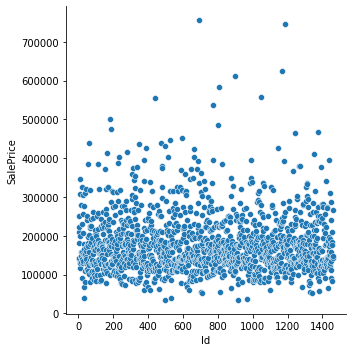

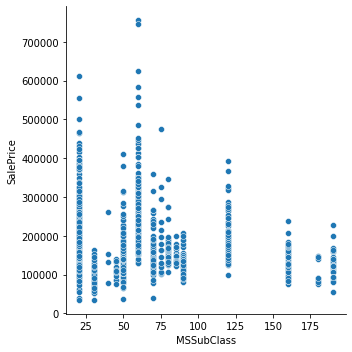

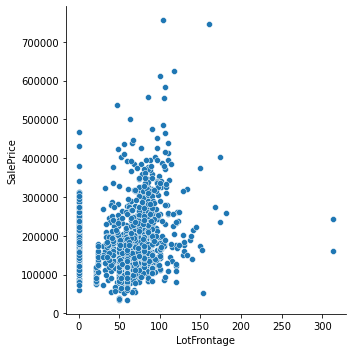

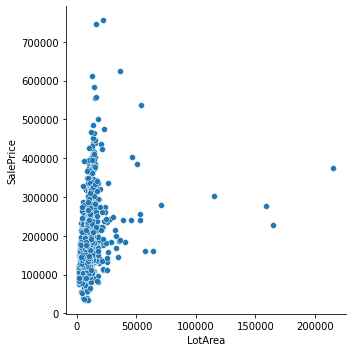

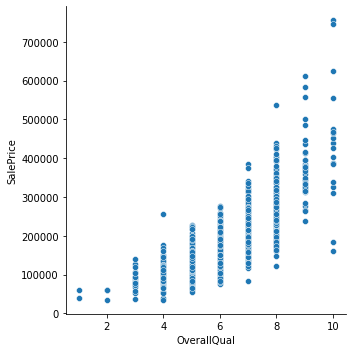

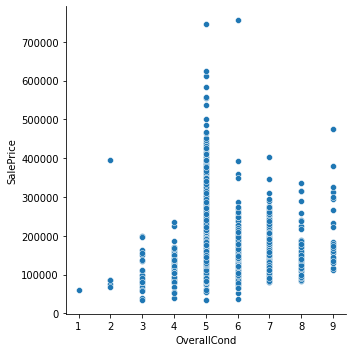

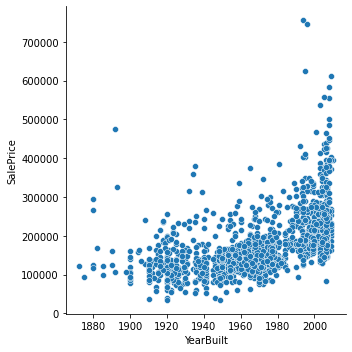

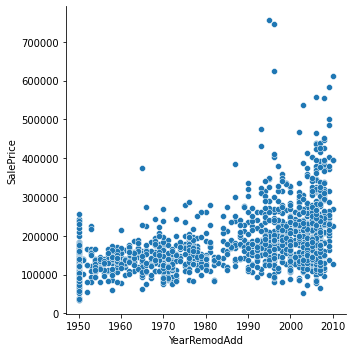

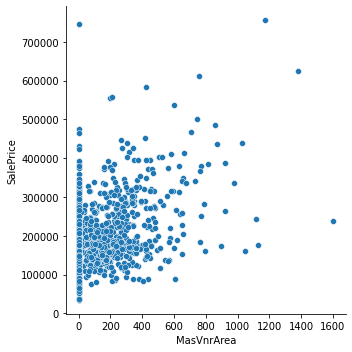

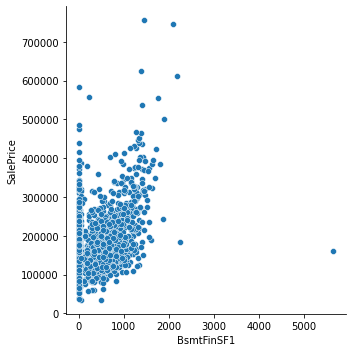

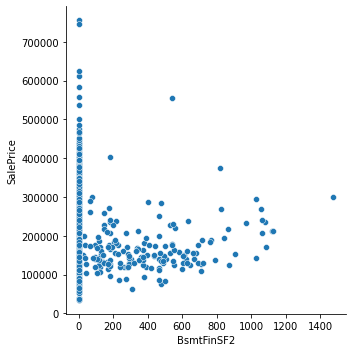

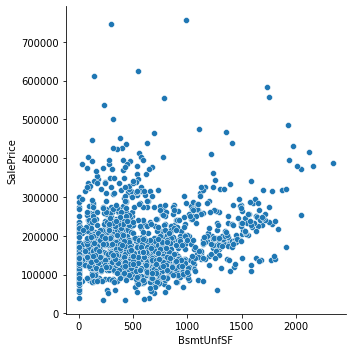

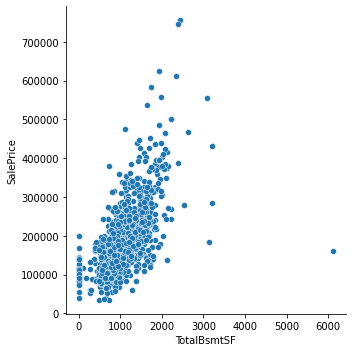

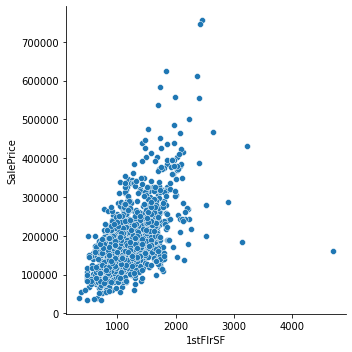

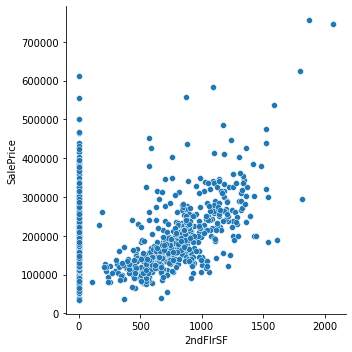

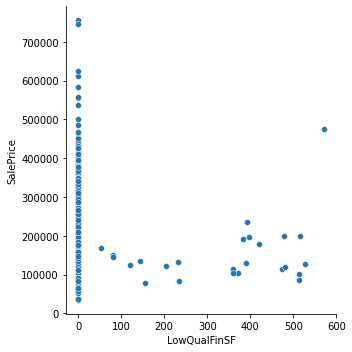

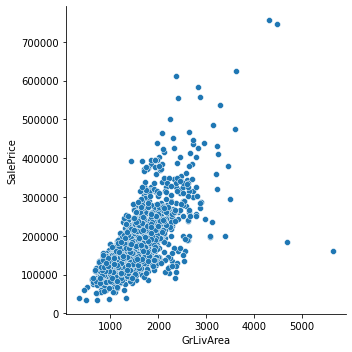

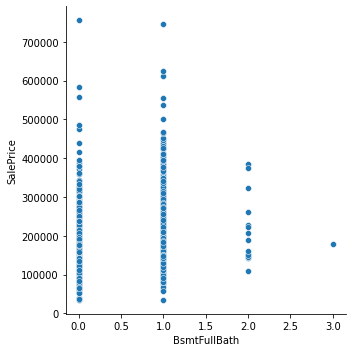

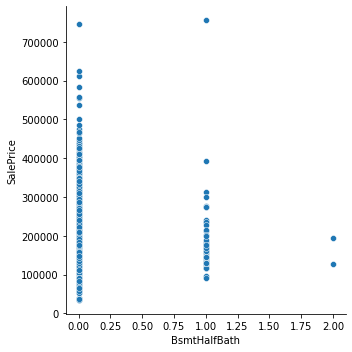

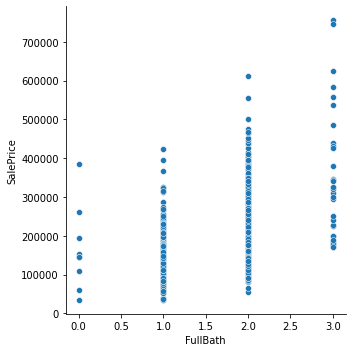

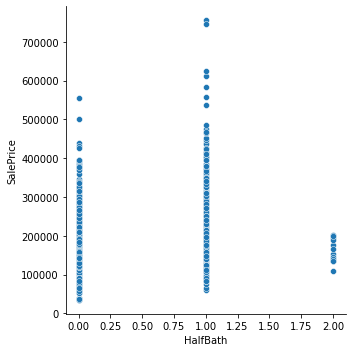

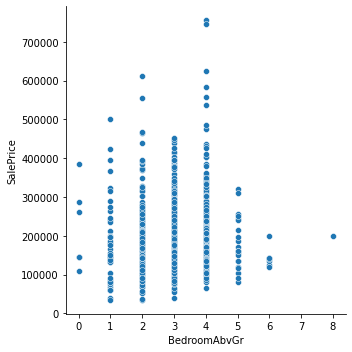

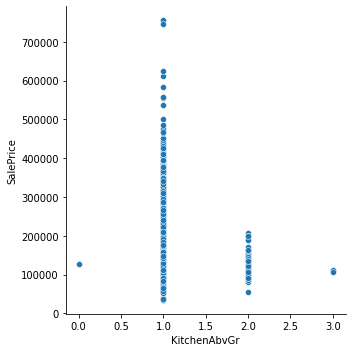

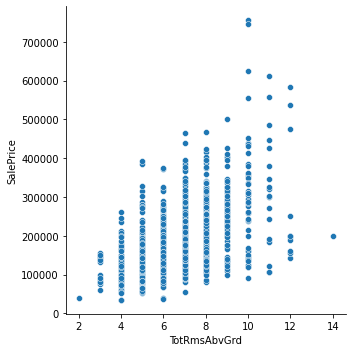

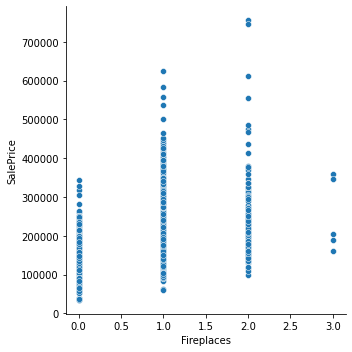

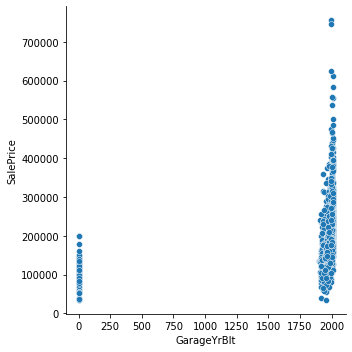

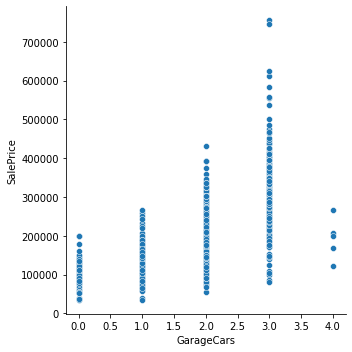

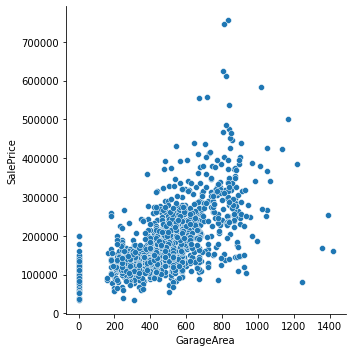

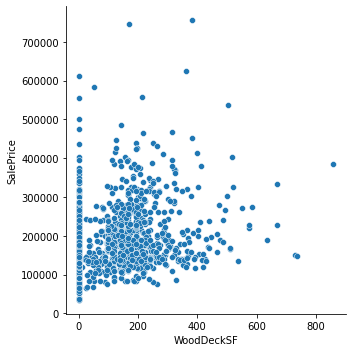

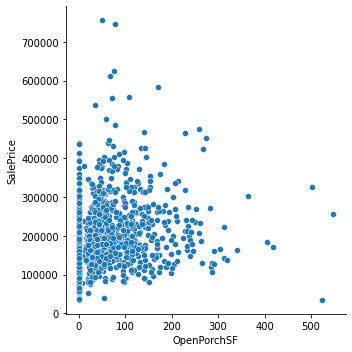

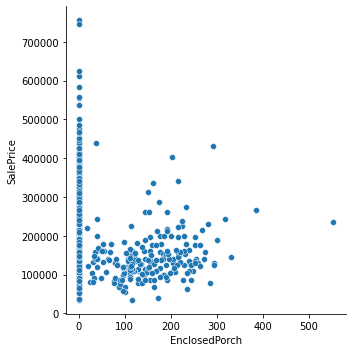

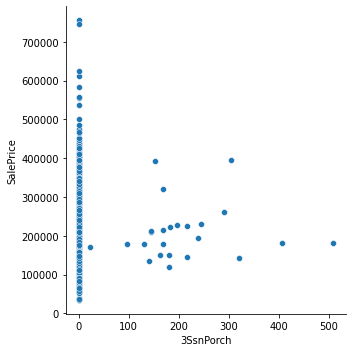

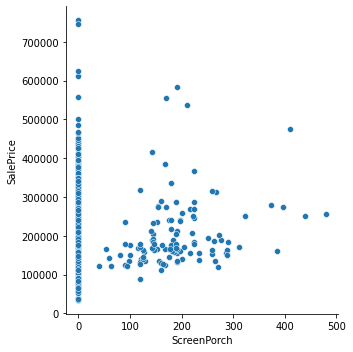

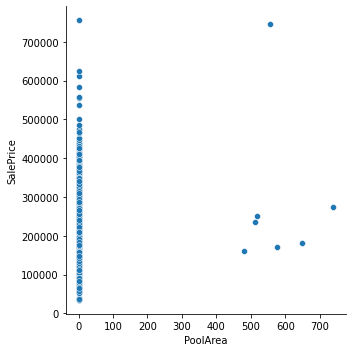

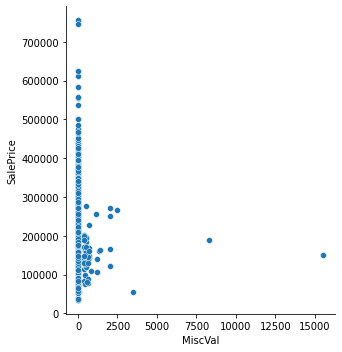

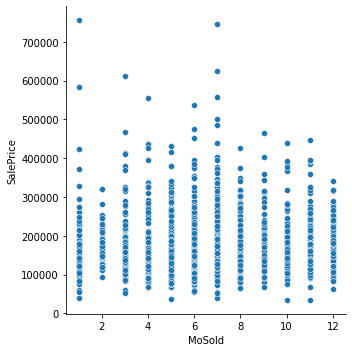

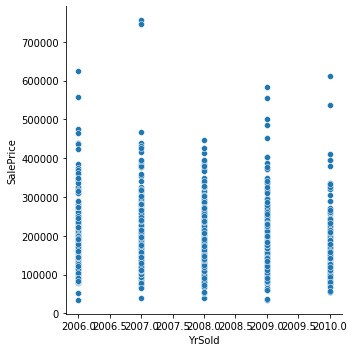

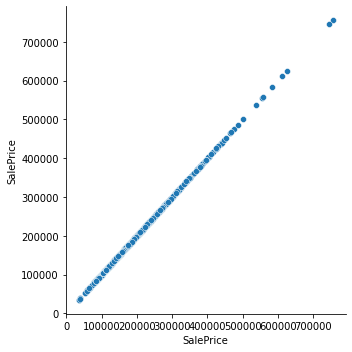

In [36]:
# visualizing relationships between the features and sale priceb
for col in df_num:
    sns.relplot(data=df_num, y='SalePrice', x=col) 
    plt.show

Some features seem to be somewhat linearly correlated, others not at all...

We can see if we have any multi collinearity with a heatmap

<AxesSubplot:>

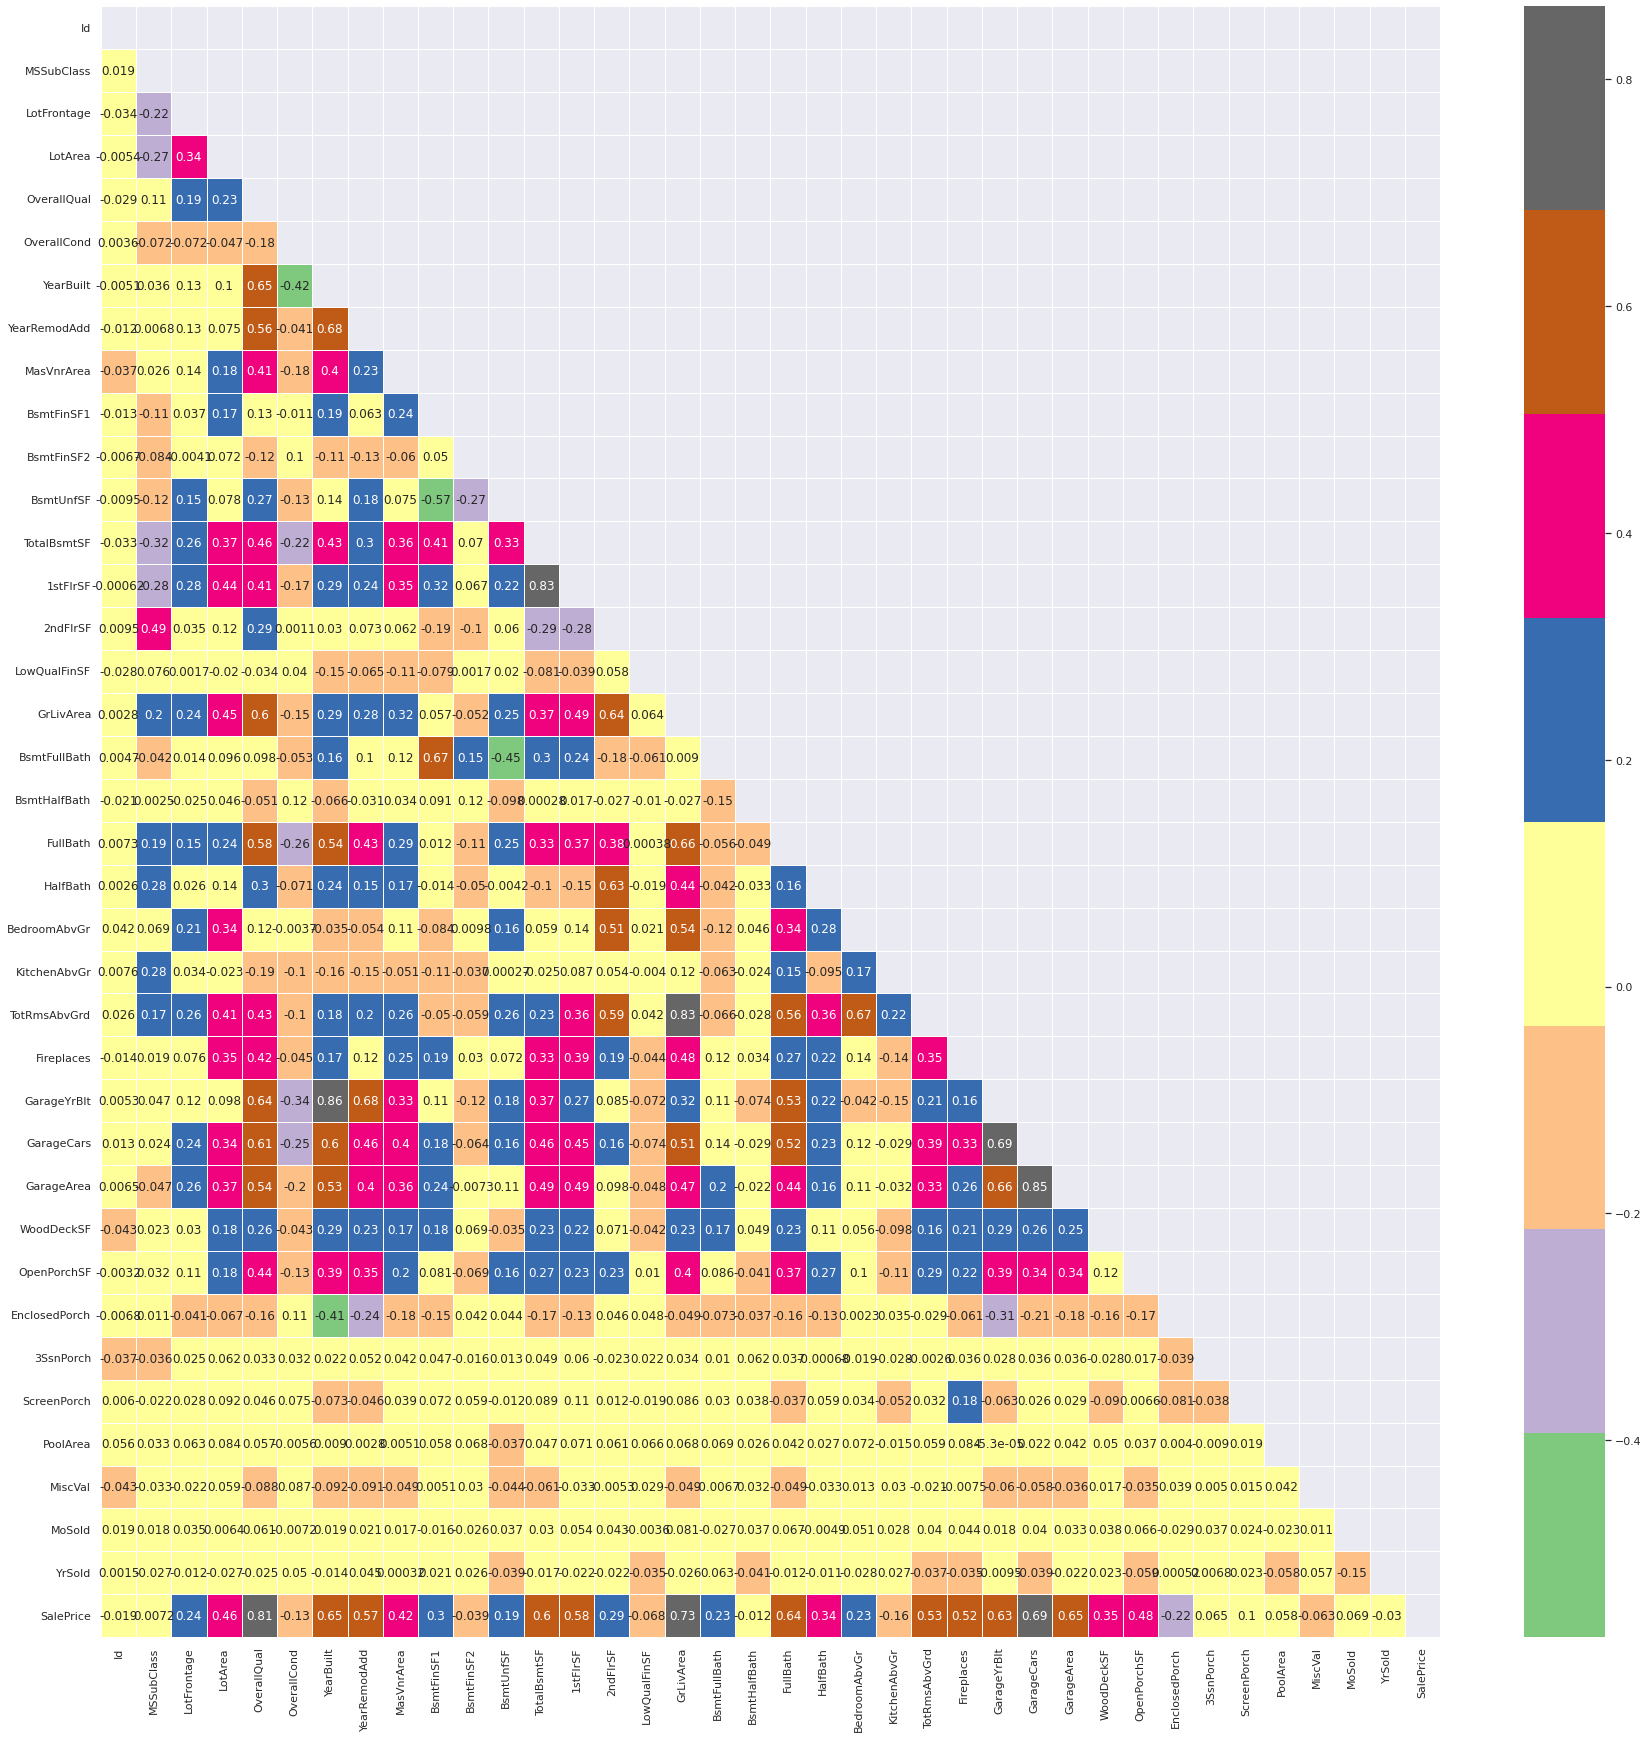

In [37]:
#creating a correlation heatmap
correlationMatrix = df_num.corr(method="spearman")
mask =np.zeros_like(correlationMatrix)
mask[np.triu_indices_from(mask)] = True
sns.set(rc ={'figure.figsize':(30,30)} )
sns.heatmap(correlationMatrix, annot =True,linewidth = .5, cmap="Accent", mask=mask)

There are certainly some features that are pretty correlated. 
- GarageYrBlt - YearBuilt
- GarageYrBlt - YearRemodAdd
- TotRmsAbvGrd - GrLivArea
- GarageArea - GarageCars
- 1stFlrSF - TotalBsmtSF

Intuitively, a lot of these features are going to be correlated with each other. If a house has more than one floor than of course it will have more SqFt. If a it has more SqFt then it more than likely has more beds... It's going to be important to sift through this properly and remove multi colinearity.

In [38]:
#dropping features with clear collinearity
to_drop = ['GarageYrBlt', 'GarageCars', 'TotRmsAbvGrd', 'YearRemodAdd', 'TotalBsmtSF'] 
df_num.drop(columns = to_drop, inplace=True)

#dropping features that are less correlated with SalePrice
df_num.drop(columns = list(correlationMatrix.SalePrice[correlationMatrix.SalePrice < .2].index), inplace=True)

/home/calvinhathcock/Documents/College/UNCC/Fall 2021/ITCS 3162/regression/project3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [39]:
#normalizing our dependent feature
df_num['SalePrice'] = np.log(df_num['SalePrice'])

/tmp/ipykernel_6340/1859628454.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_num['SalePrice'] = np.log(df_num['SalePrice'])


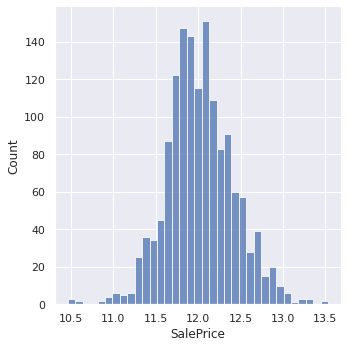

In [40]:
sns.displot(df_num['SalePrice']);

I'd like to revisit the categorical variables and be more selective.

In [41]:
sns.set(rc = {'figure.figsize':(15,8)})

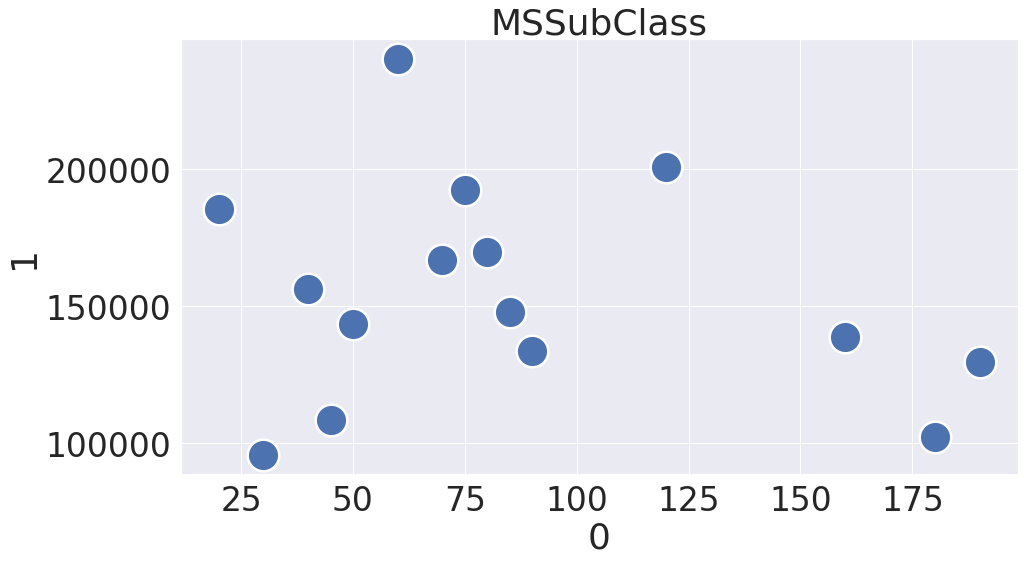

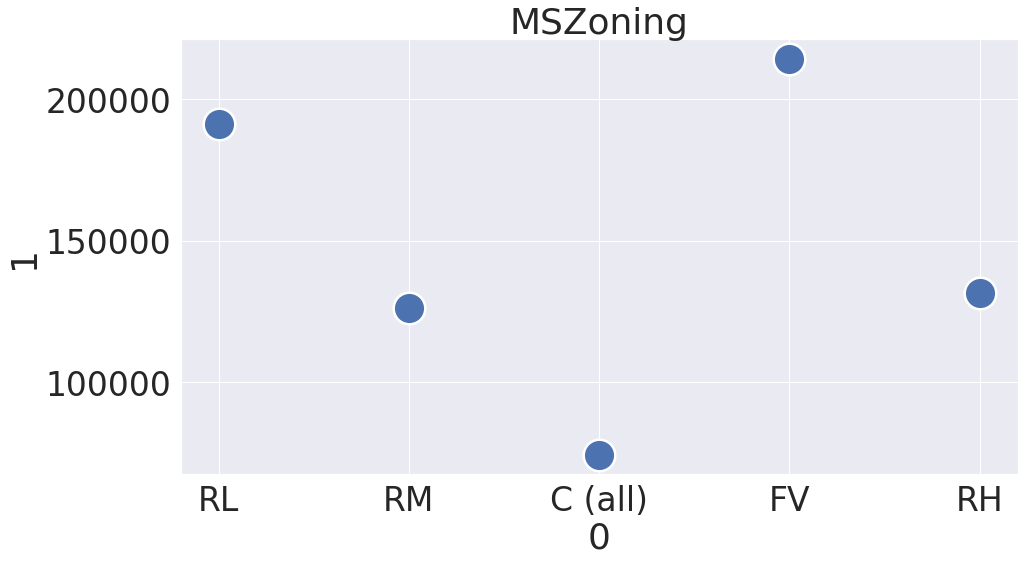

/tmp/ipykernel_6340/445760785.py:10: RuntimeWarning: invalid value encountered in long_scalars
  avg = subset.SalePrice.sum()/len(subset)


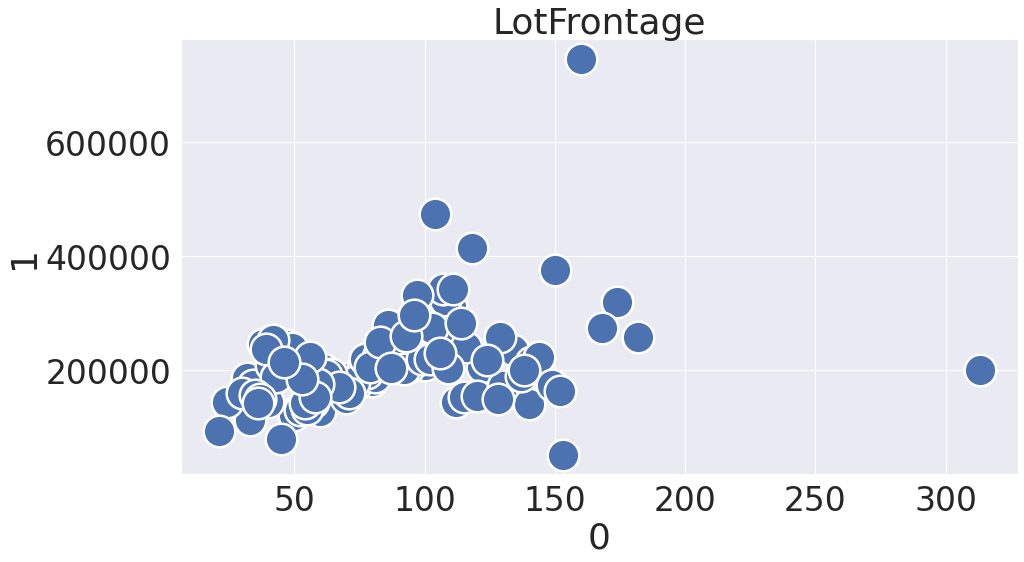

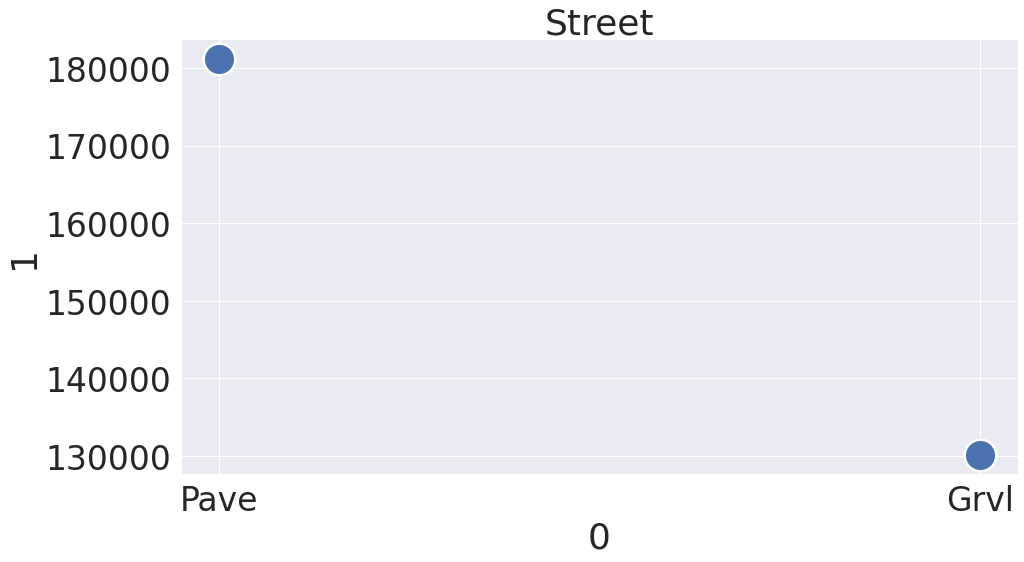

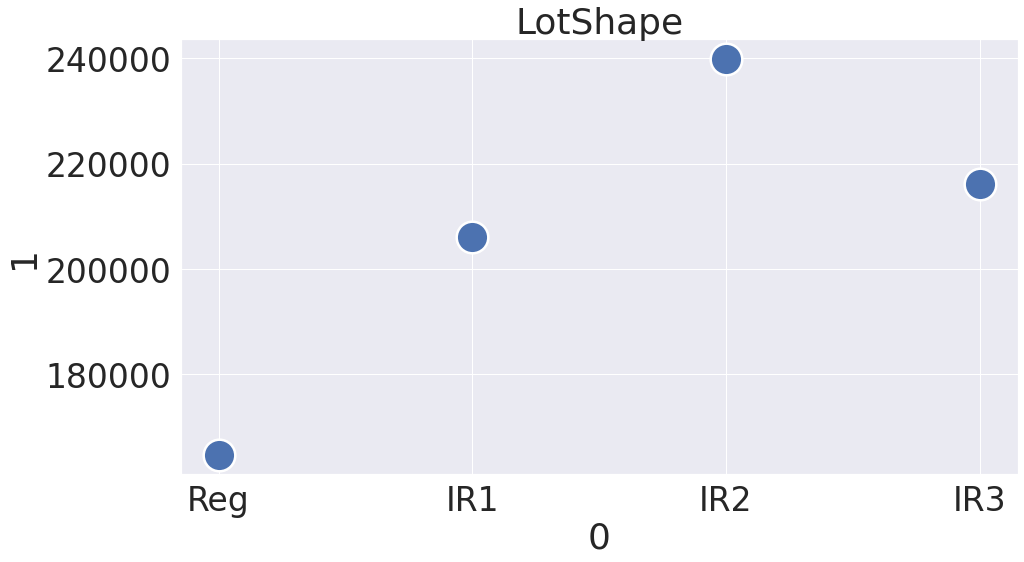

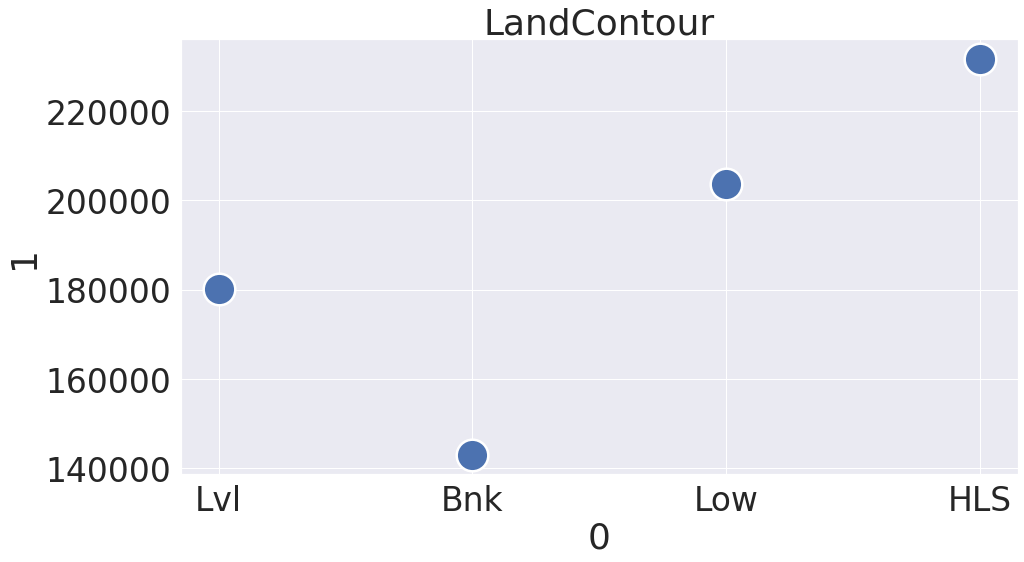

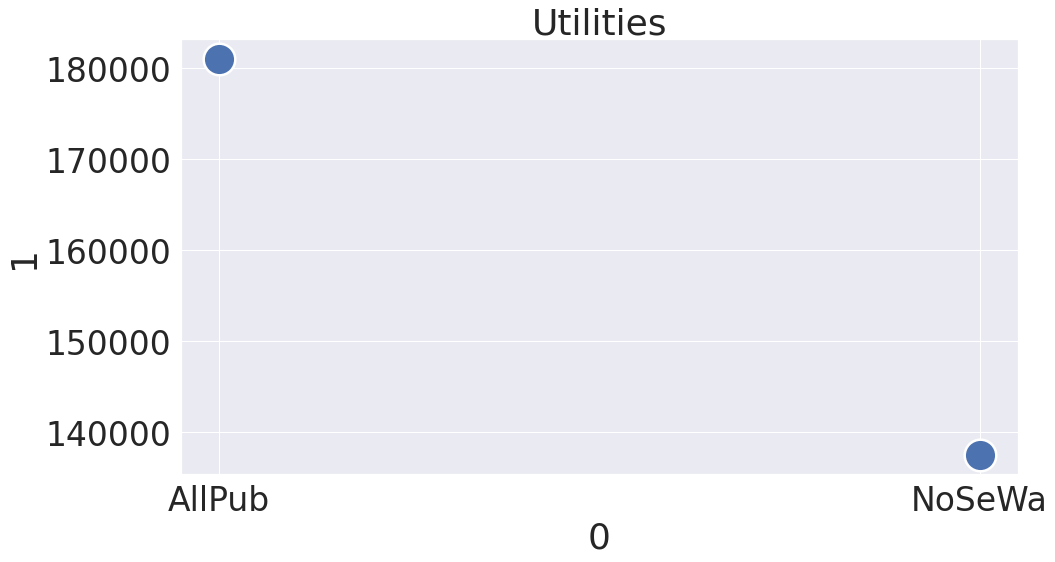

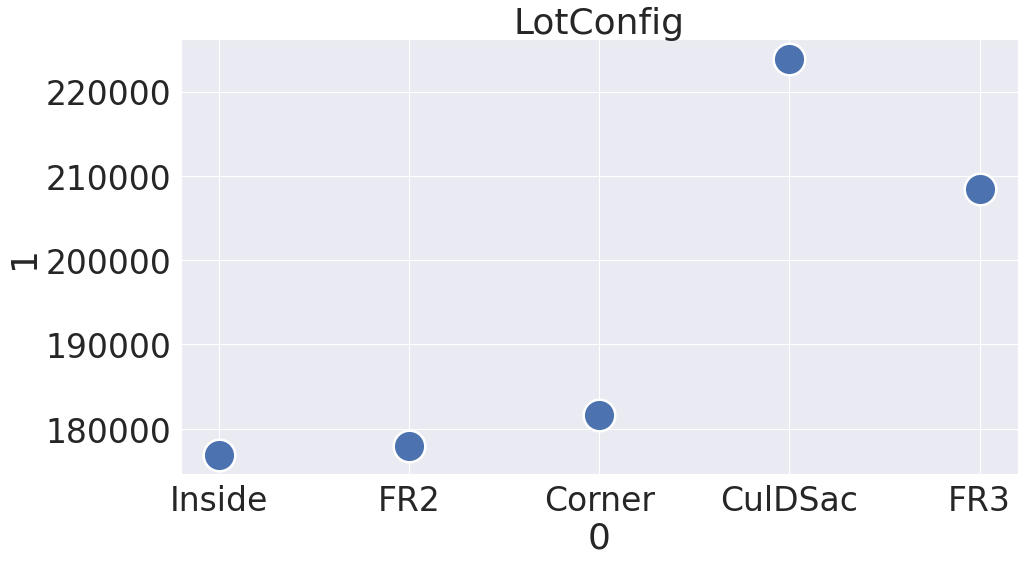

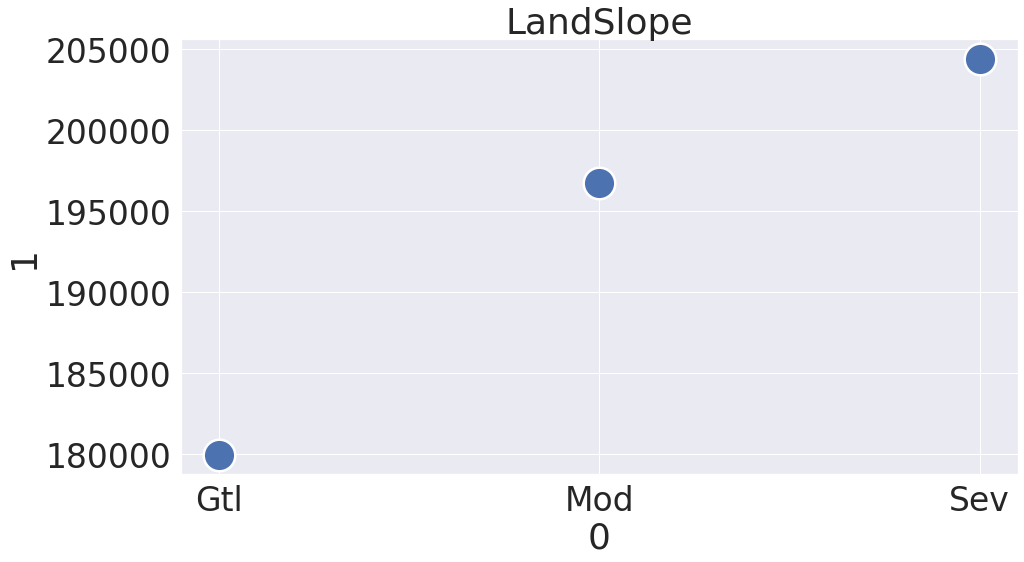

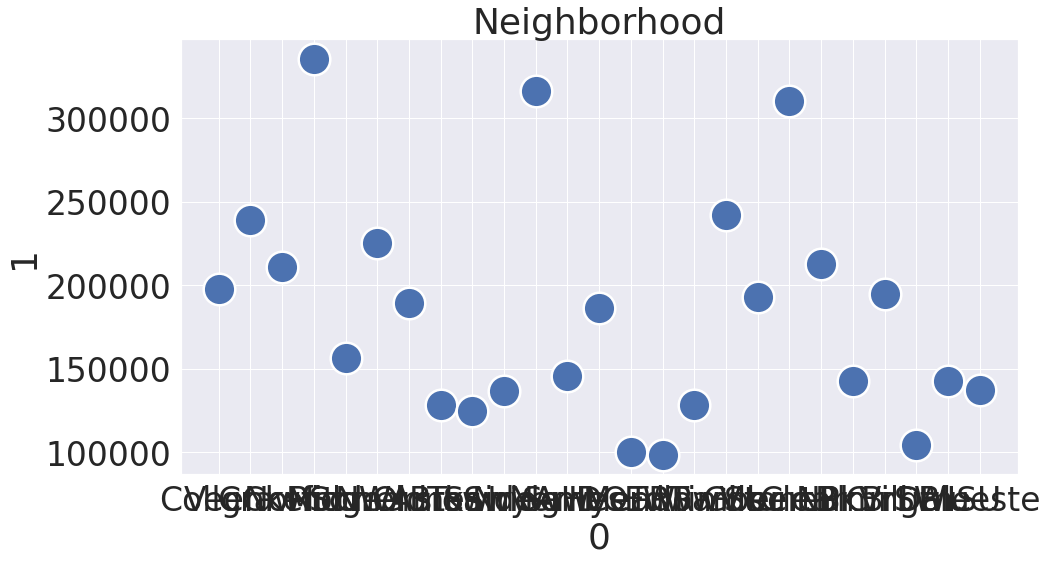

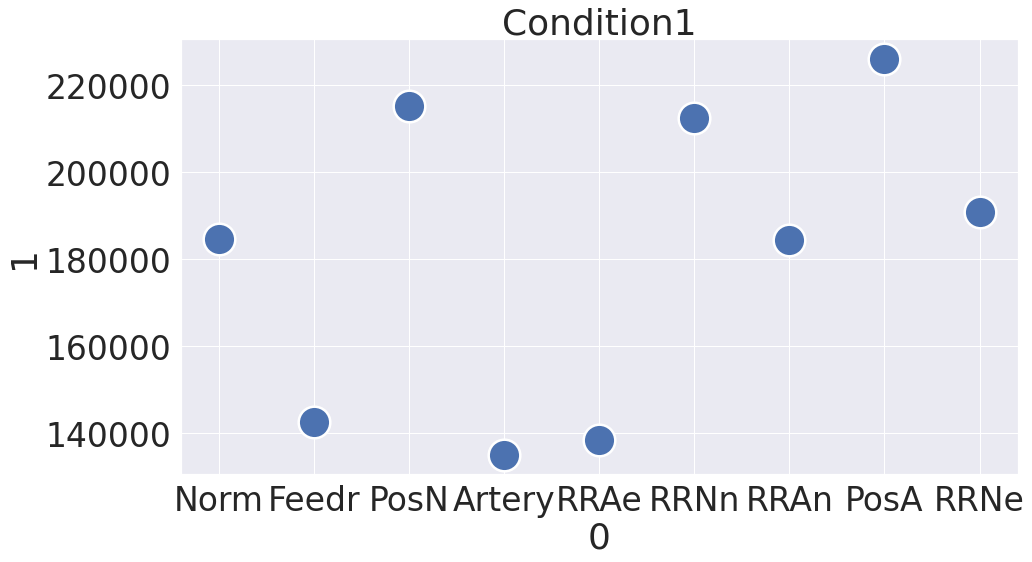

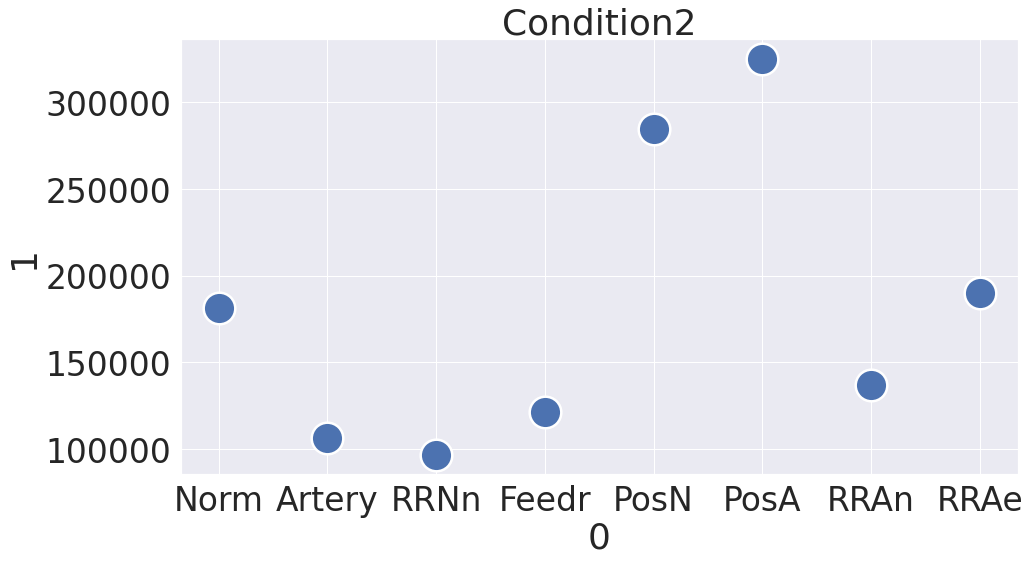

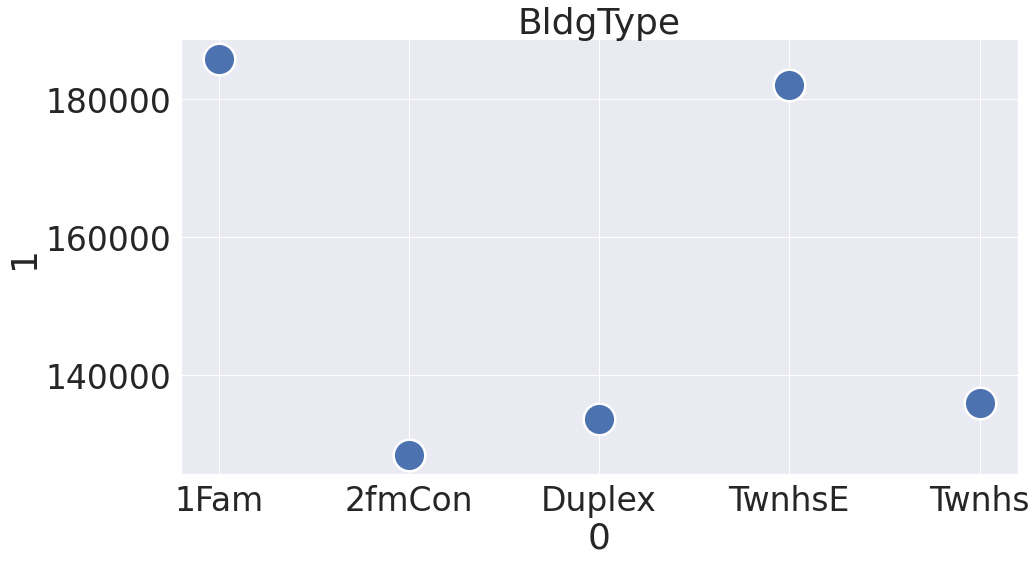

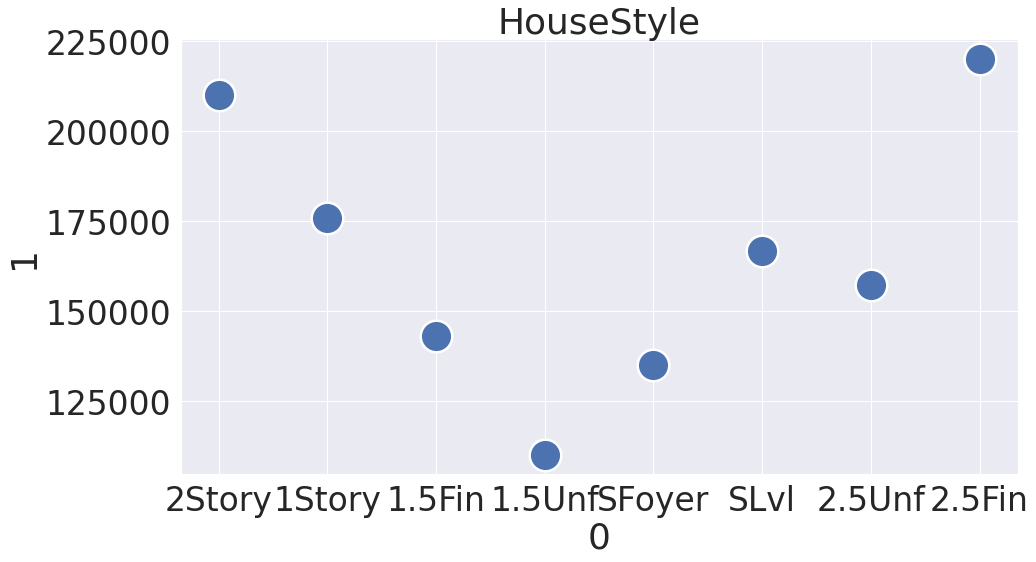

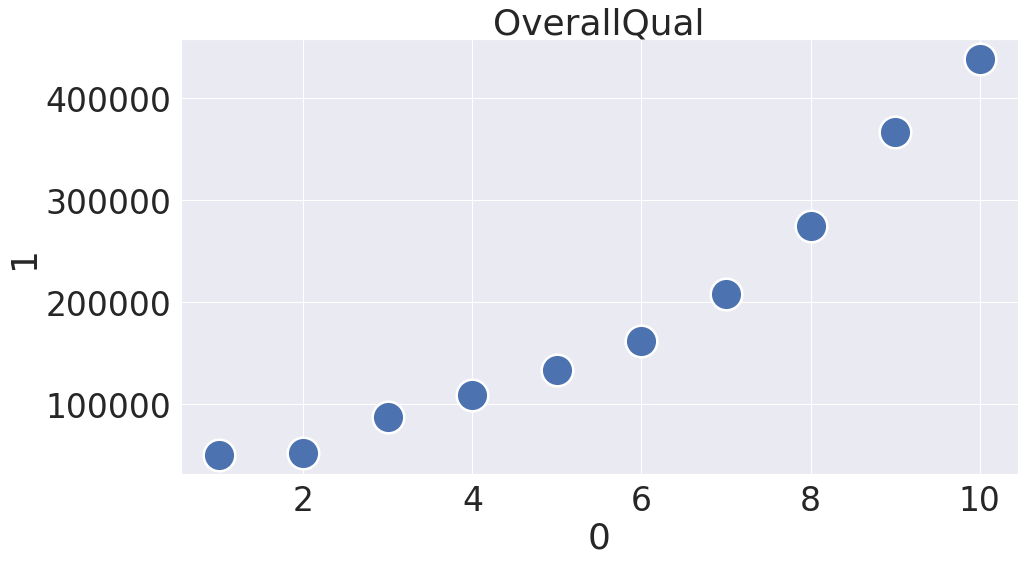

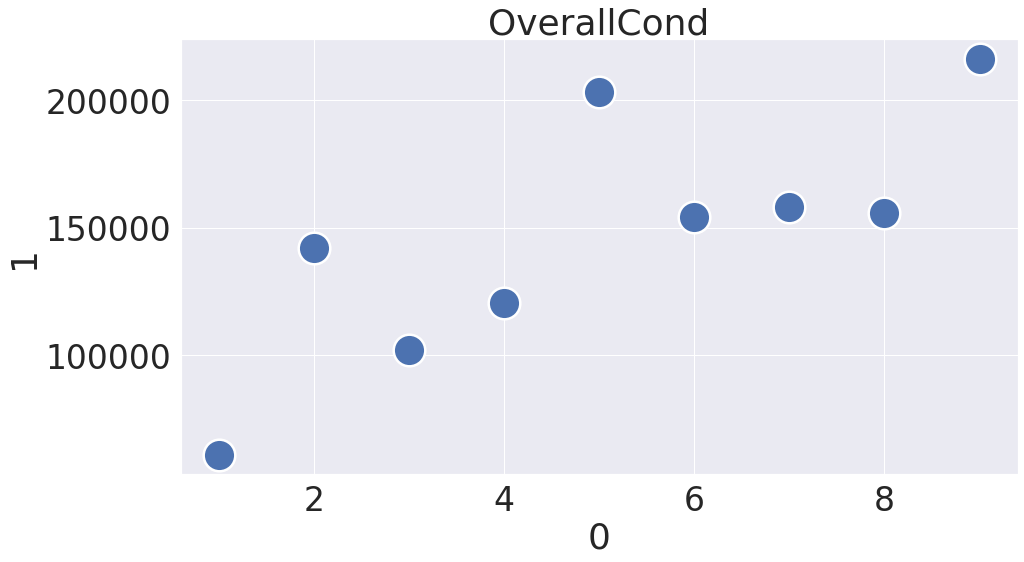

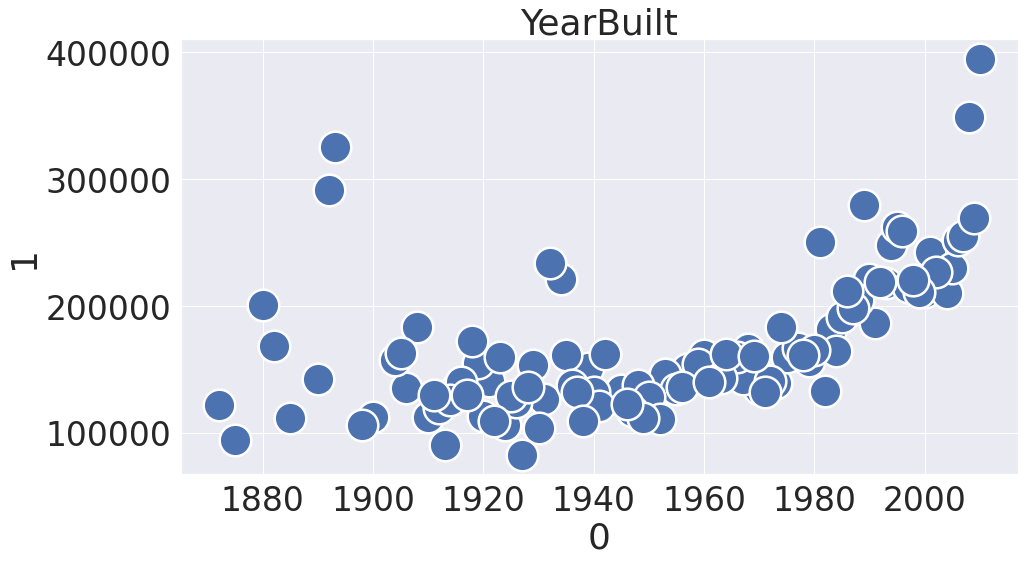

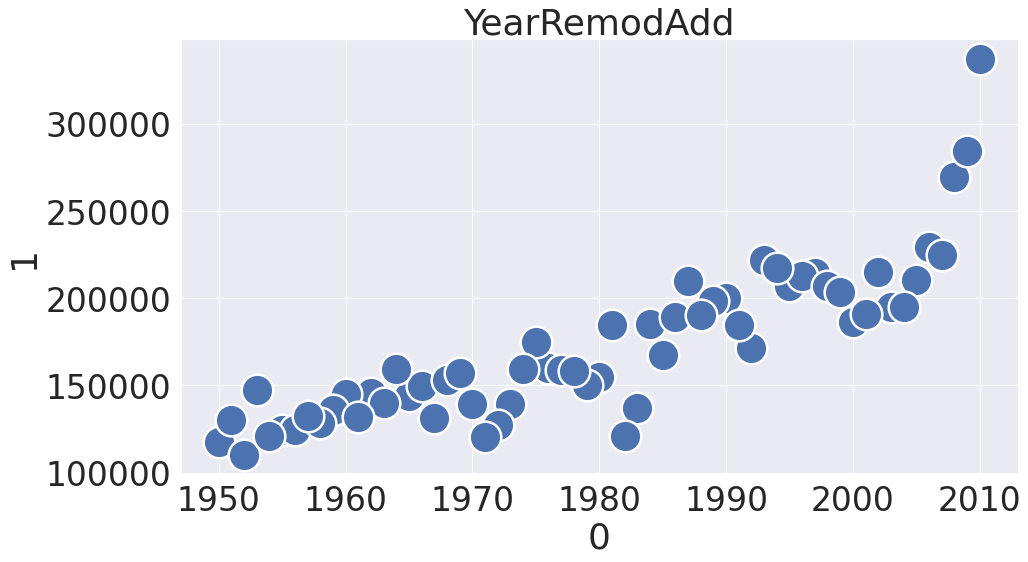

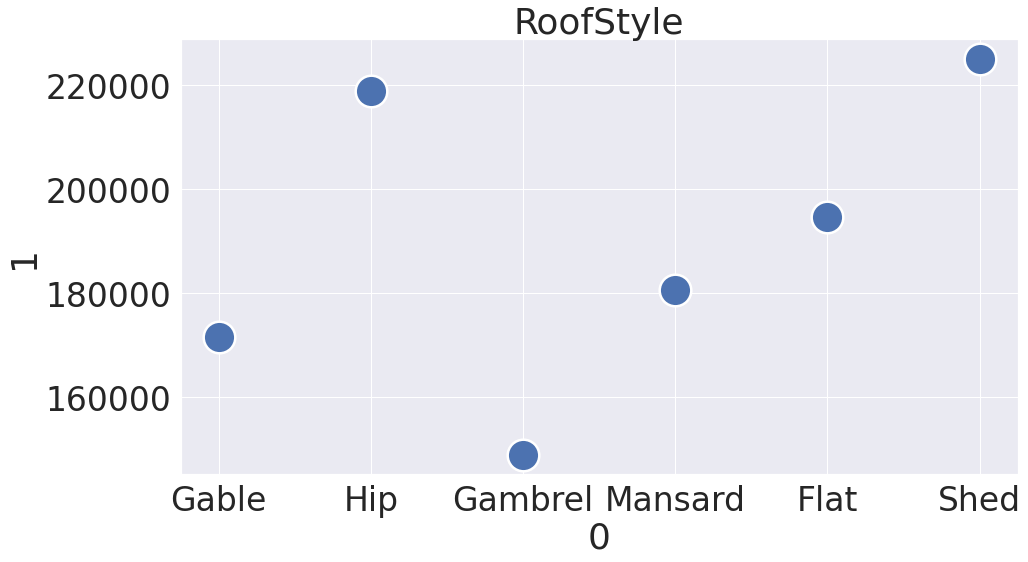

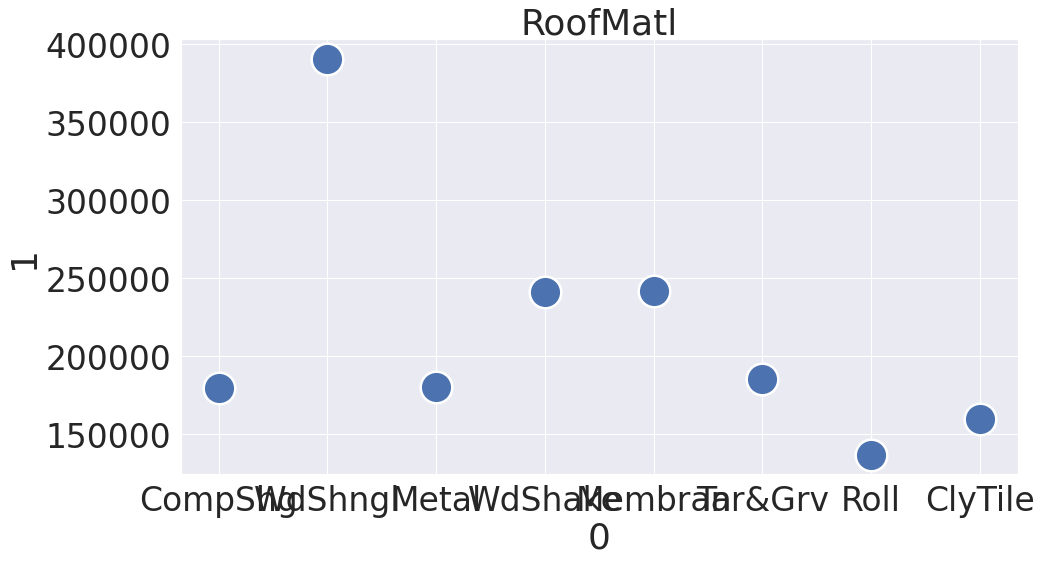

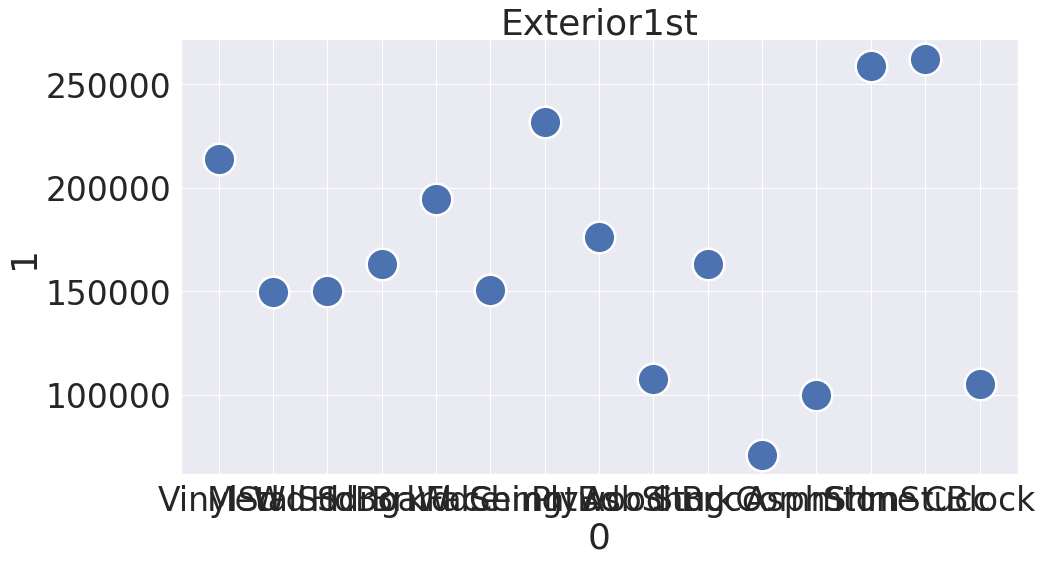

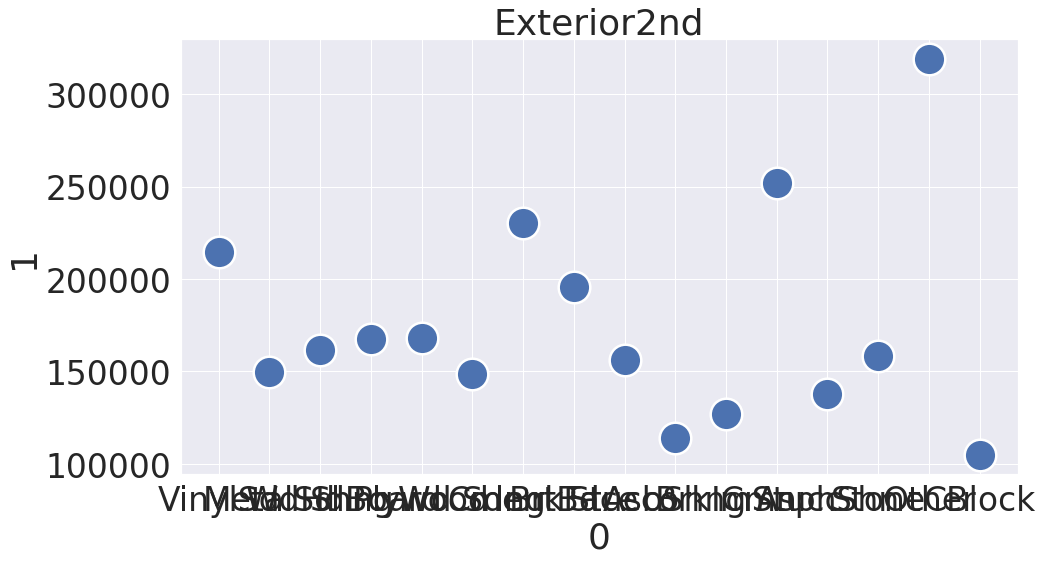

/tmp/ipykernel_6340/445760785.py:10: RuntimeWarning: invalid value encountered in long_scalars
  avg = subset.SalePrice.sum()/len(subset)


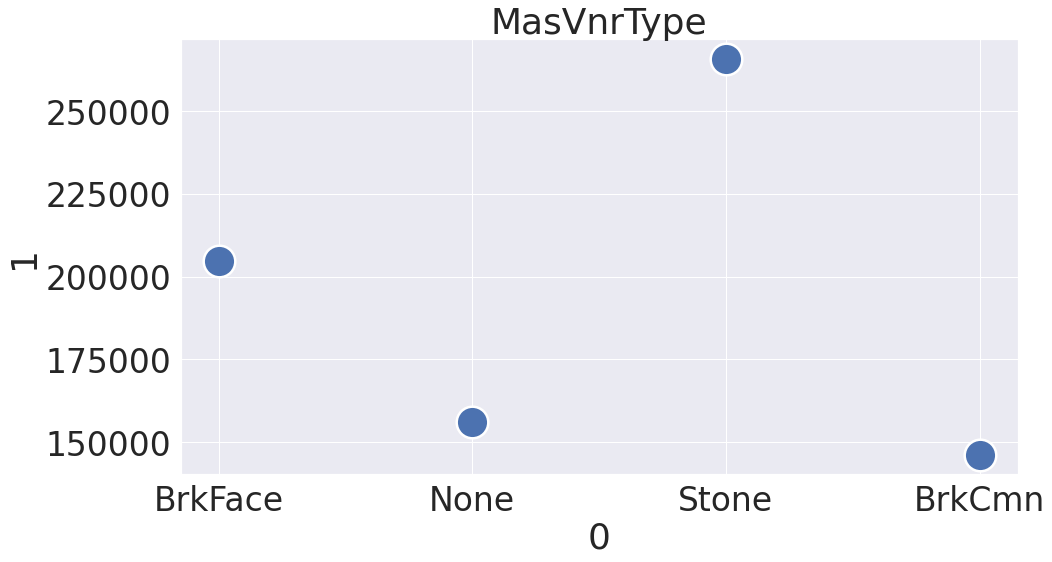

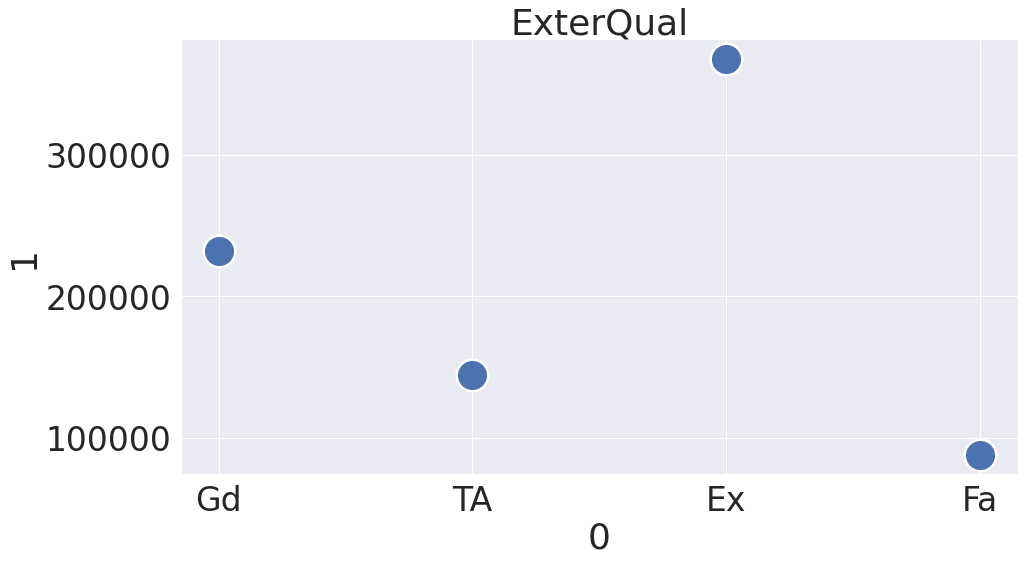

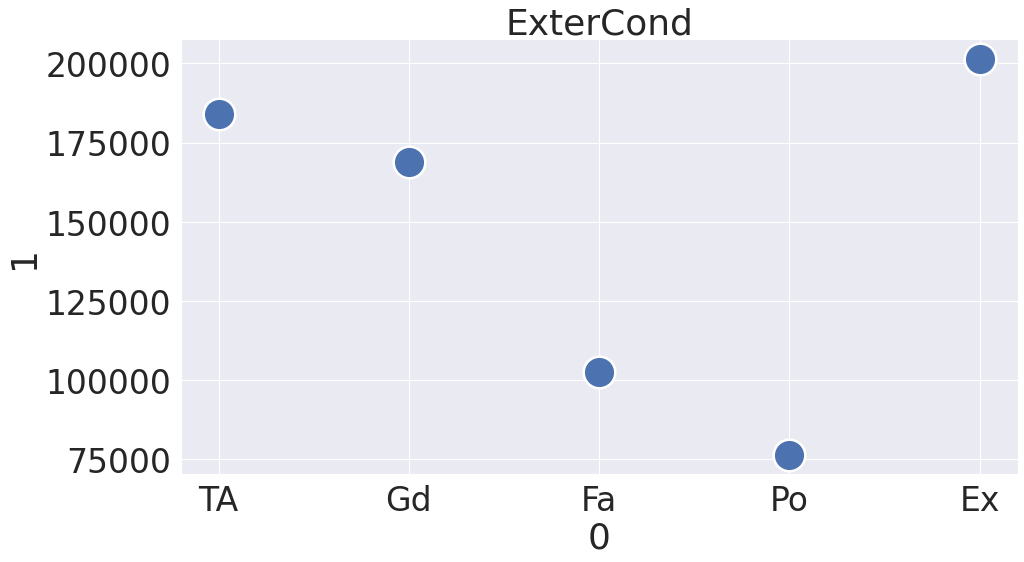

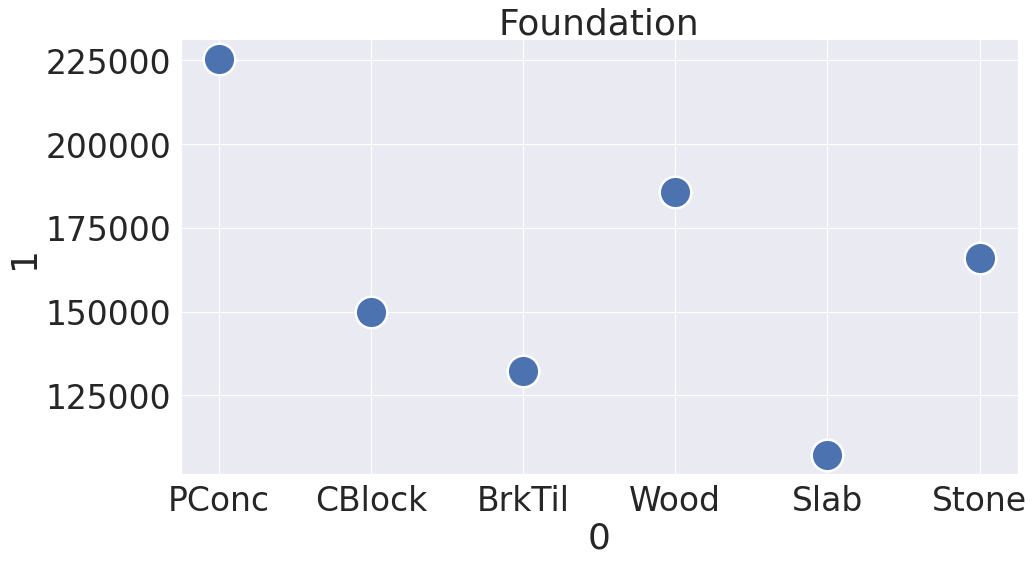

/tmp/ipykernel_6340/445760785.py:10: RuntimeWarning: invalid value encountered in long_scalars
  avg = subset.SalePrice.sum()/len(subset)


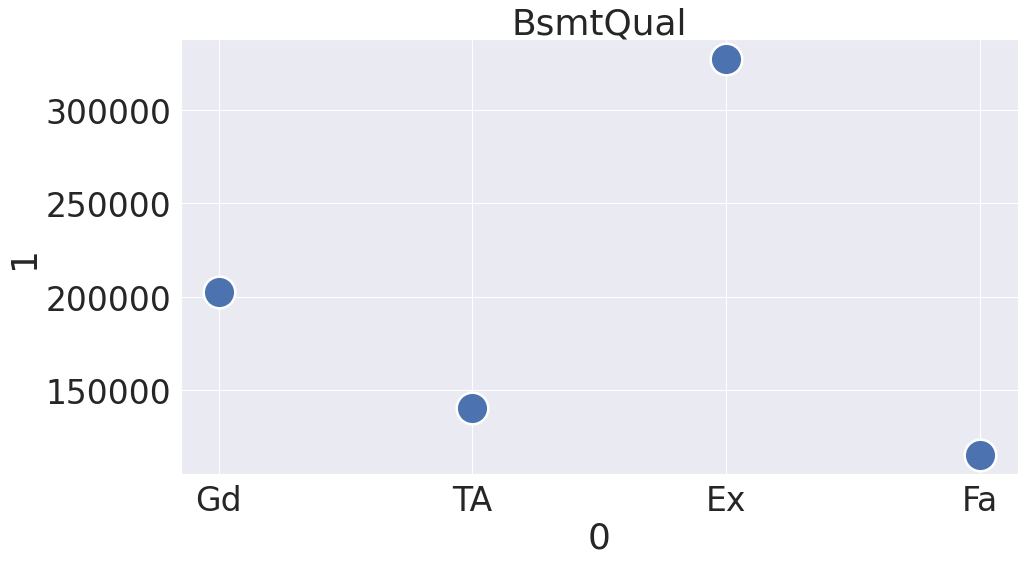

/tmp/ipykernel_6340/445760785.py:10: RuntimeWarning: invalid value encountered in long_scalars
  avg = subset.SalePrice.sum()/len(subset)


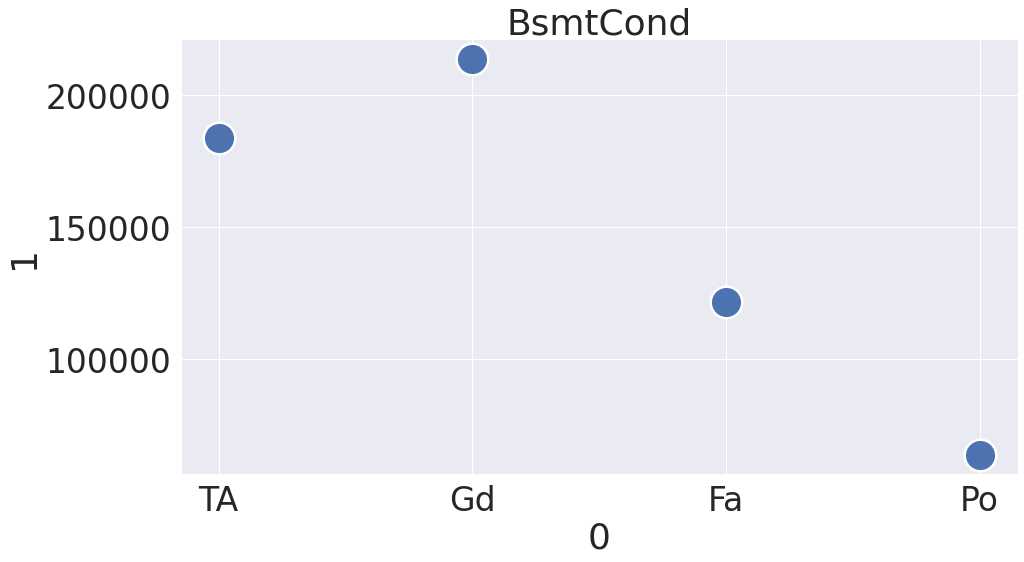

/tmp/ipykernel_6340/445760785.py:10: RuntimeWarning: invalid value encountered in long_scalars
  avg = subset.SalePrice.sum()/len(subset)


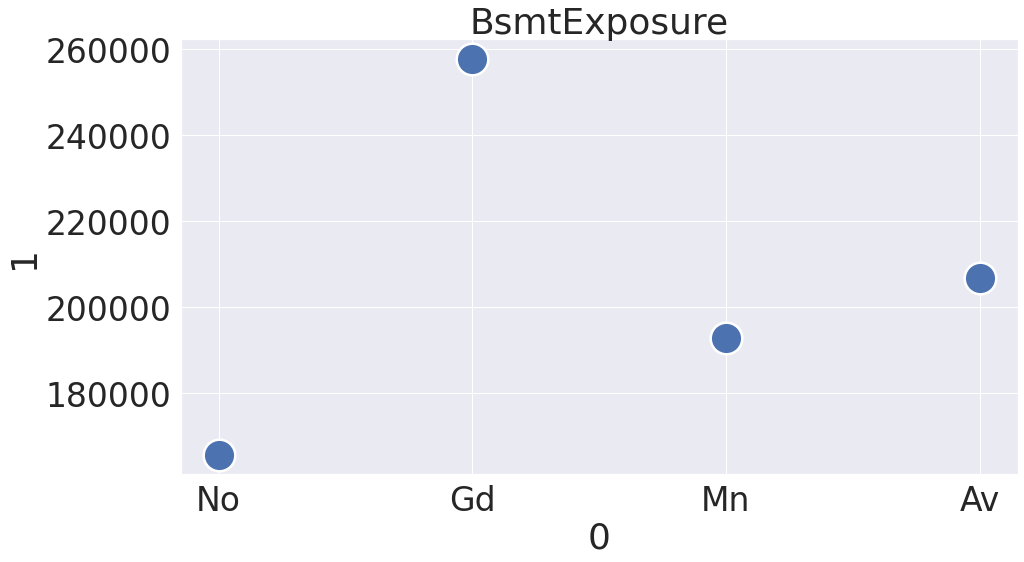

/tmp/ipykernel_6340/445760785.py:10: RuntimeWarning: invalid value encountered in long_scalars
  avg = subset.SalePrice.sum()/len(subset)


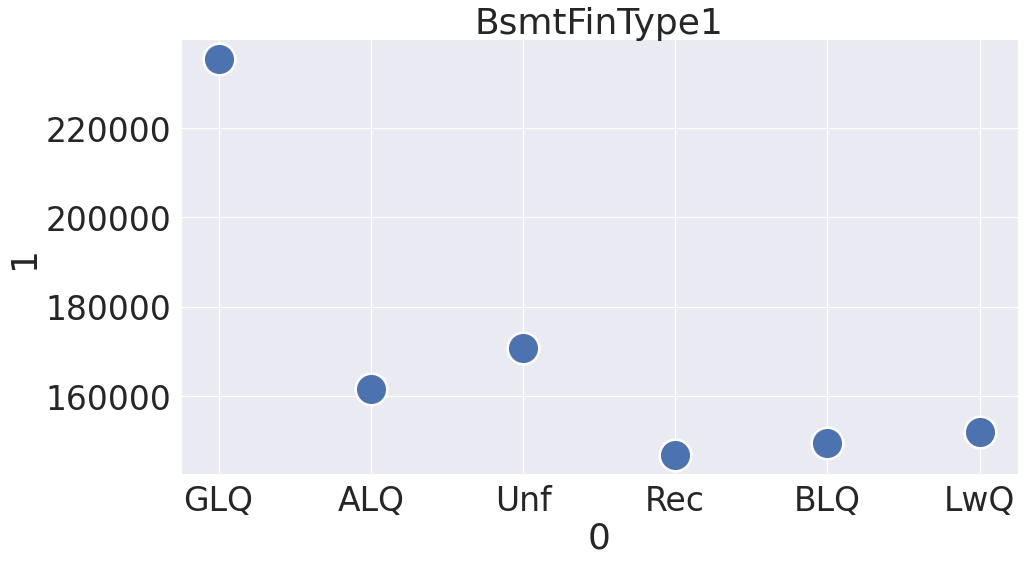

/tmp/ipykernel_6340/445760785.py:10: RuntimeWarning: invalid value encountered in long_scalars
  avg = subset.SalePrice.sum()/len(subset)


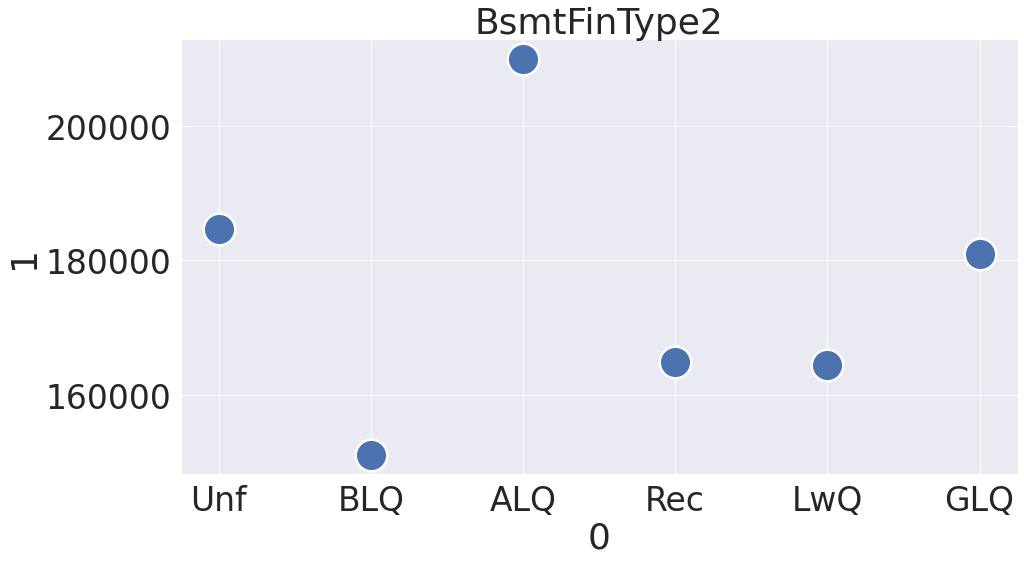

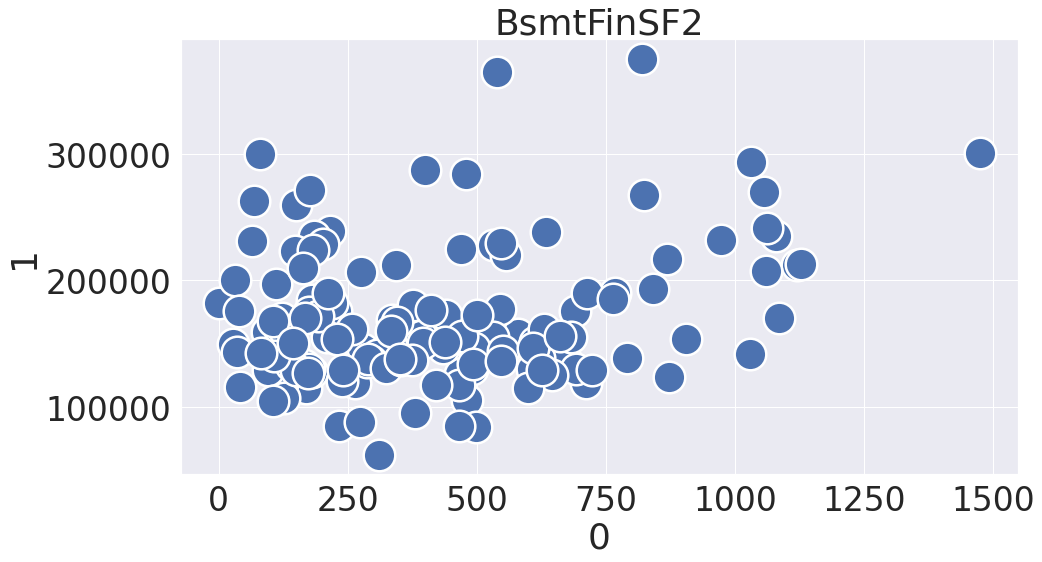

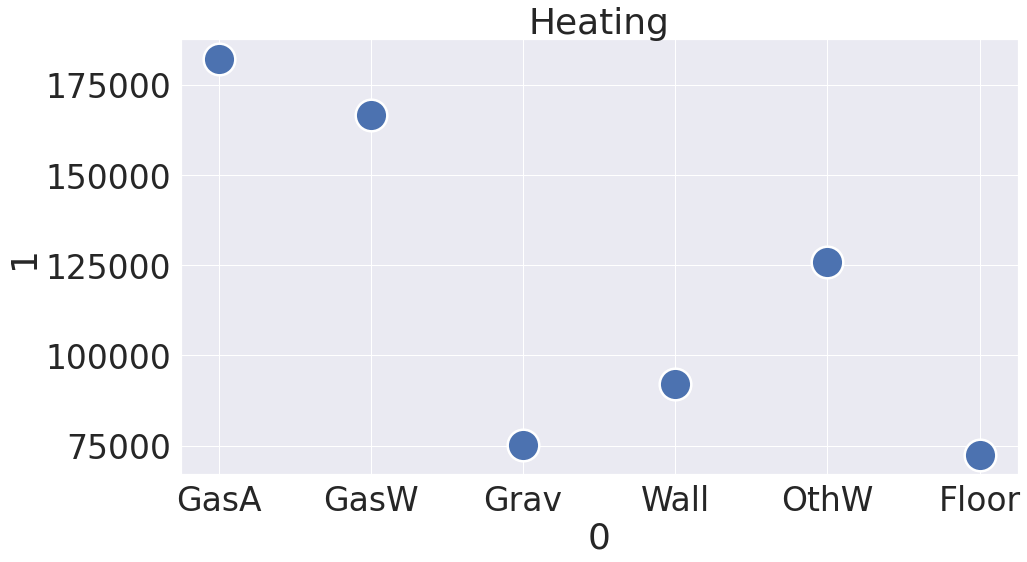

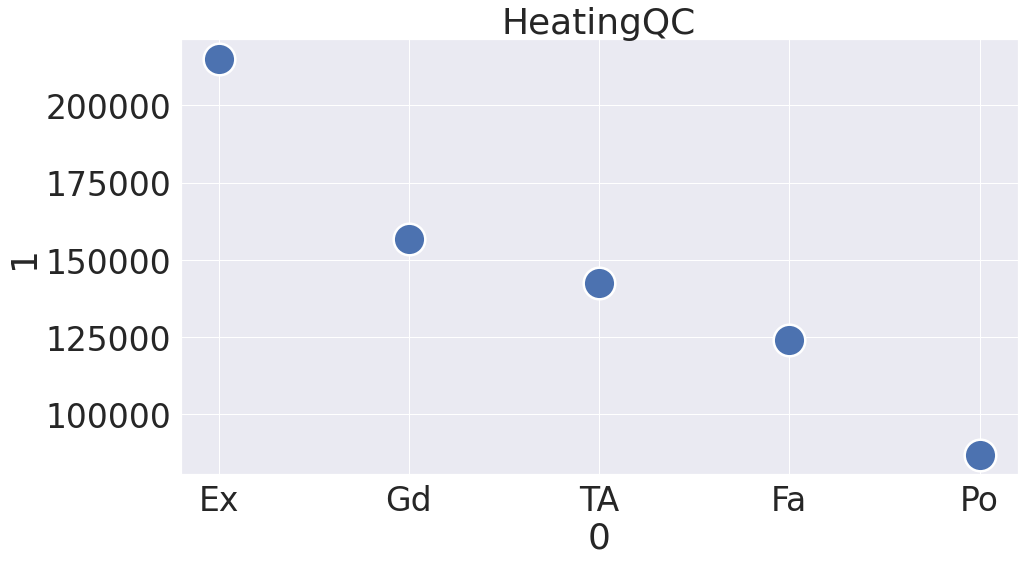

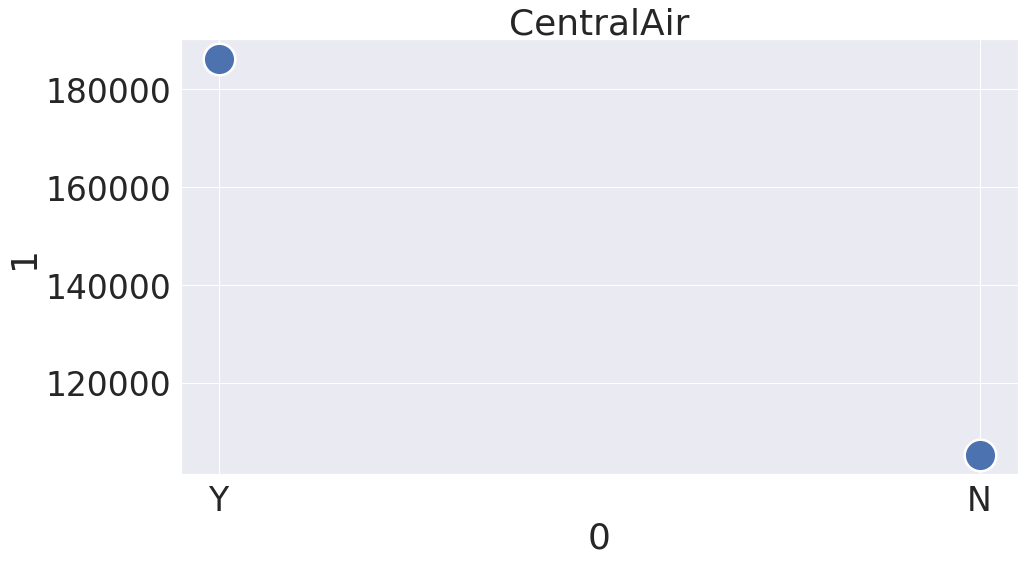

/tmp/ipykernel_6340/445760785.py:10: RuntimeWarning: invalid value encountered in long_scalars
  avg = subset.SalePrice.sum()/len(subset)


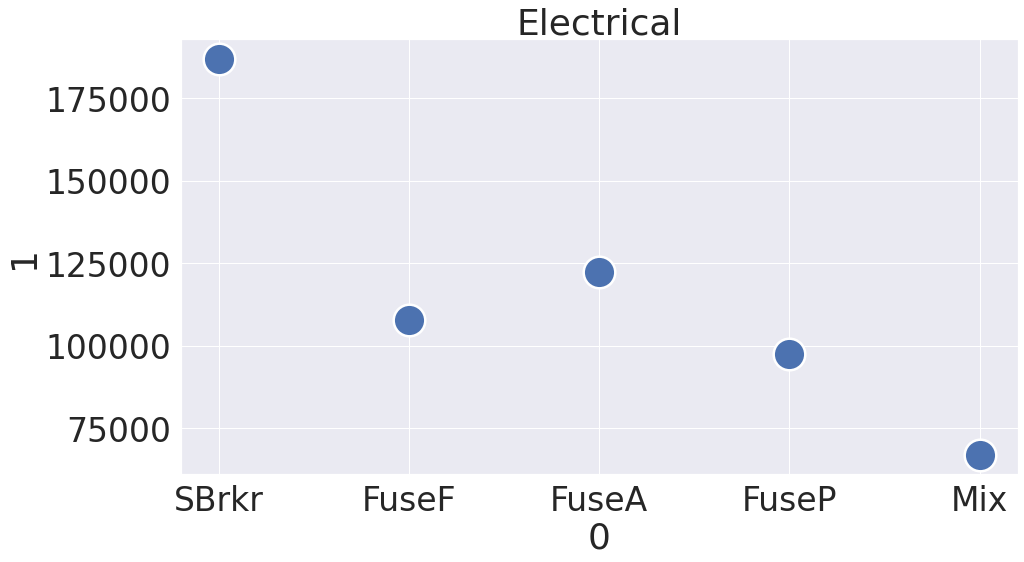

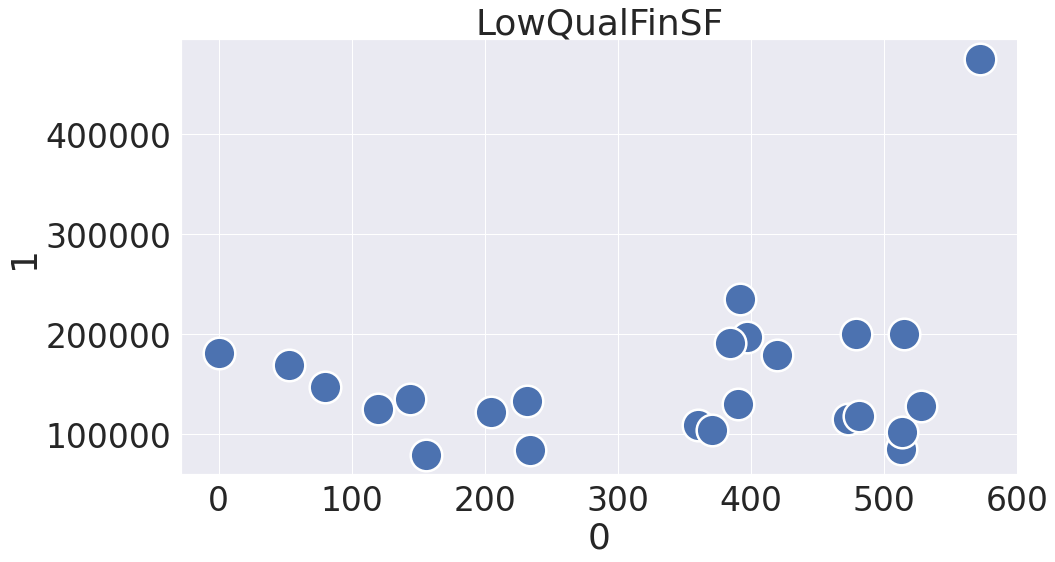

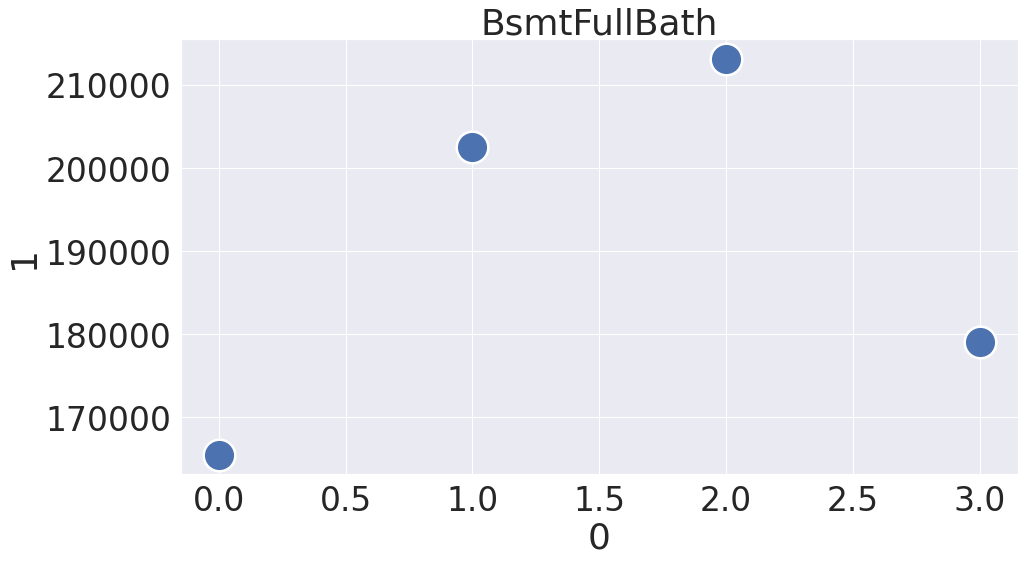

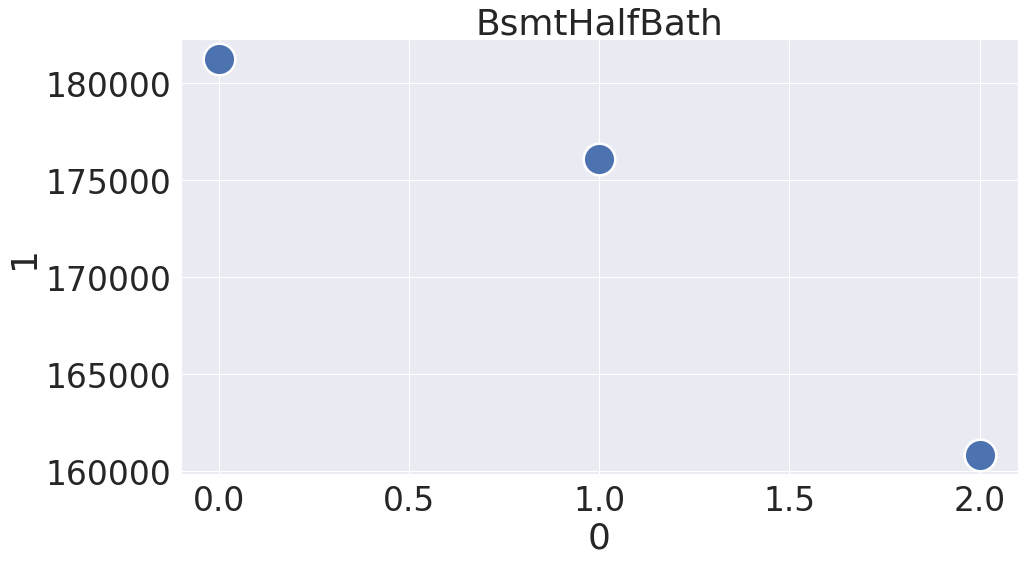

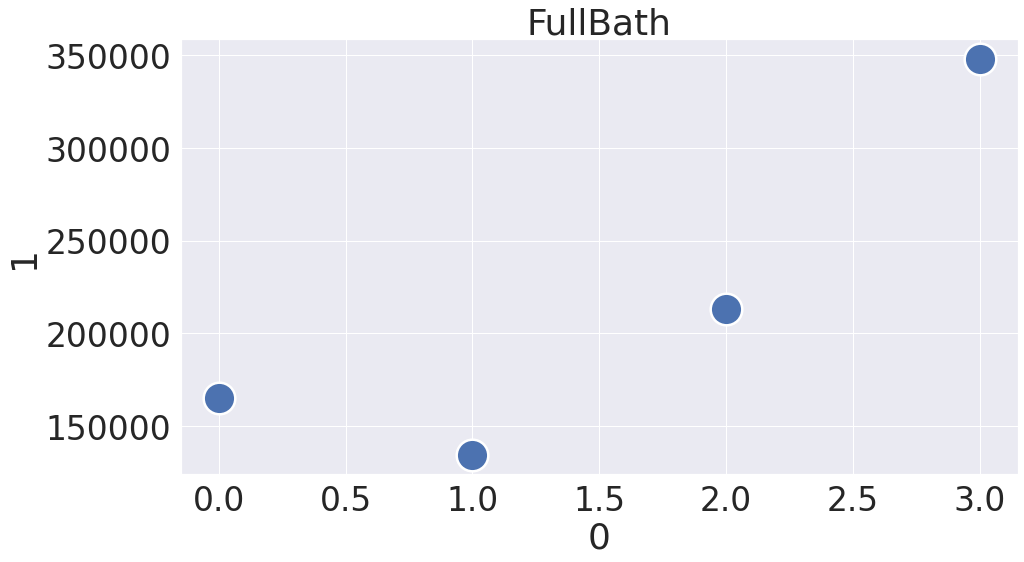

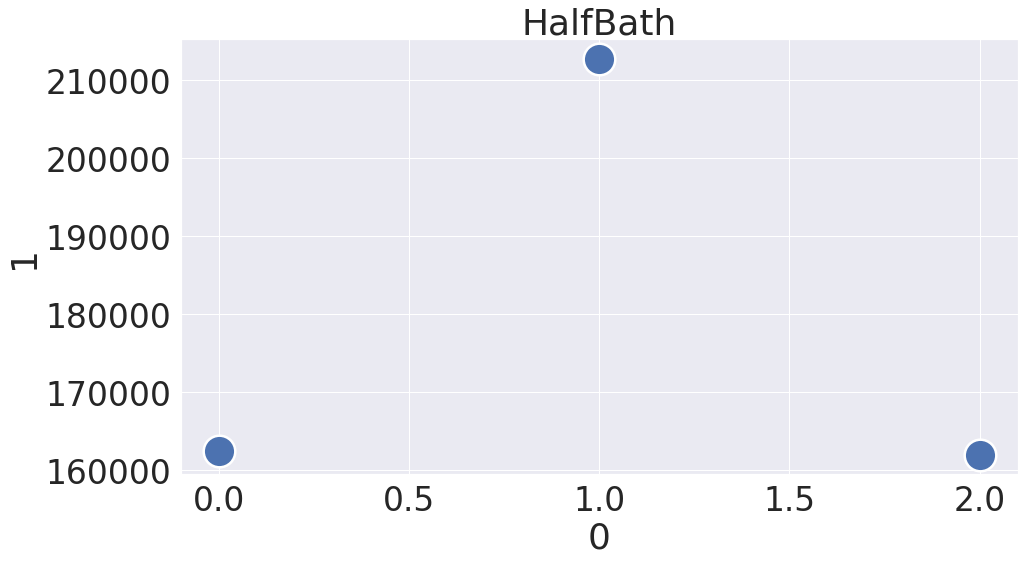

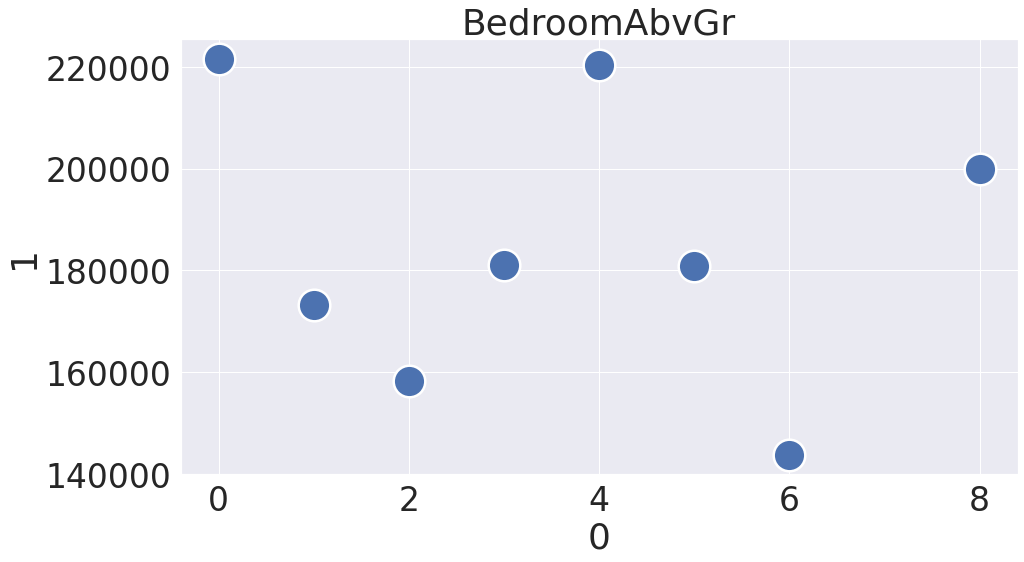

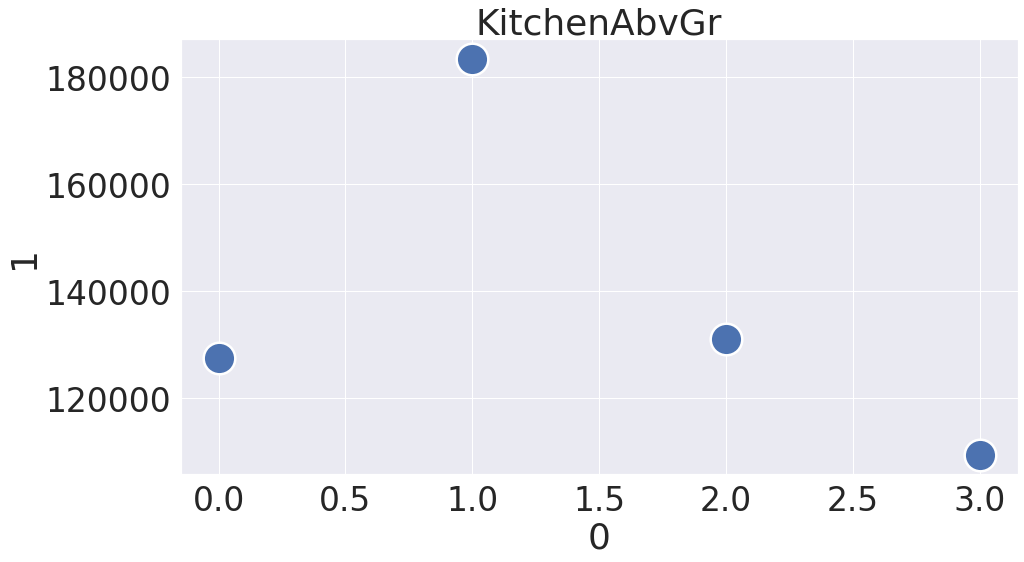

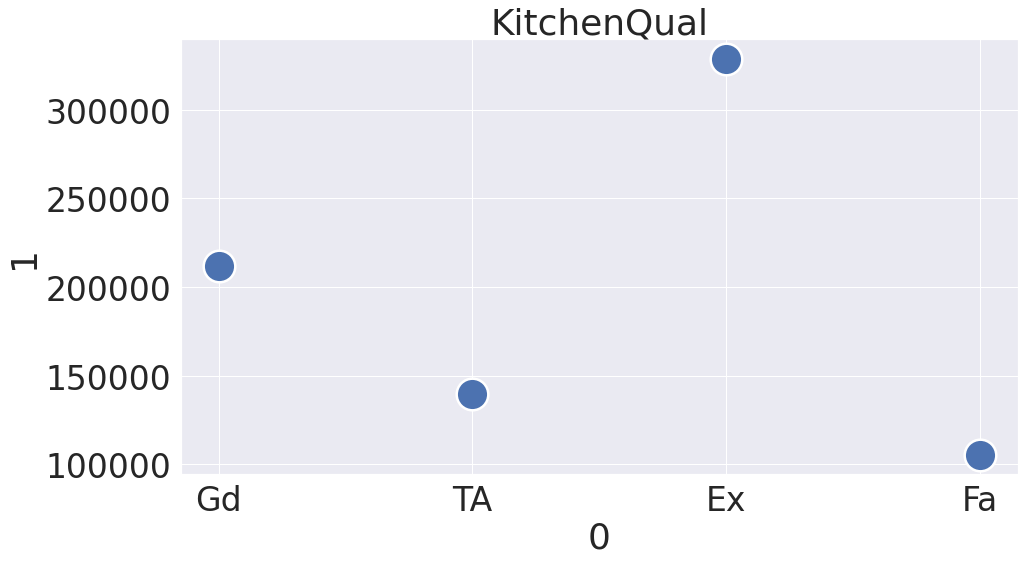

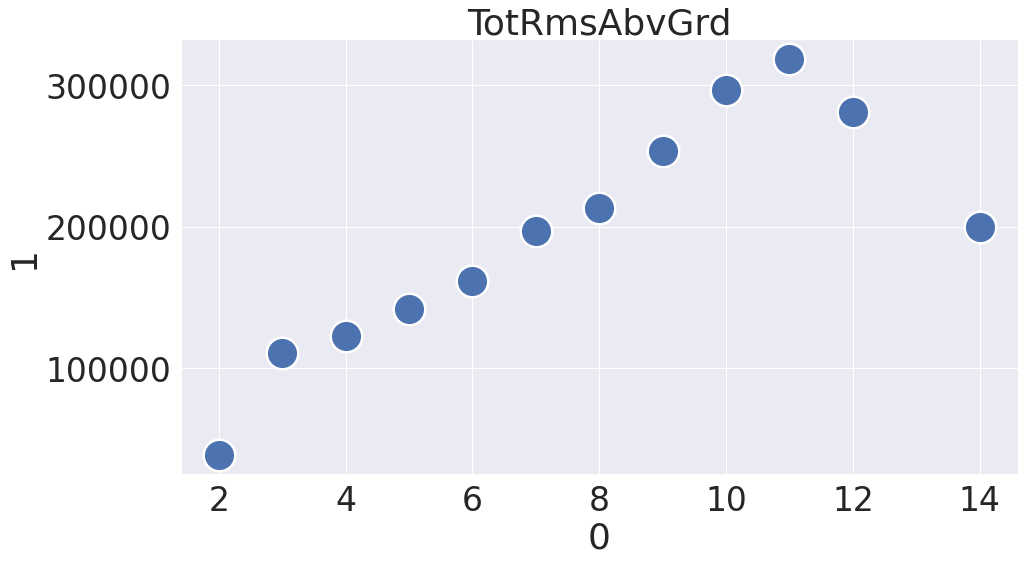

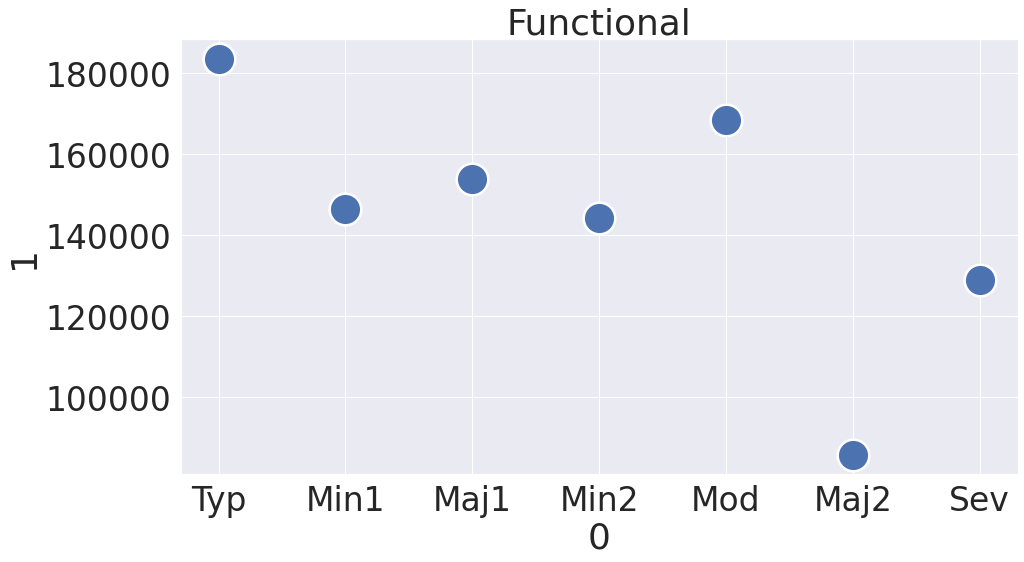

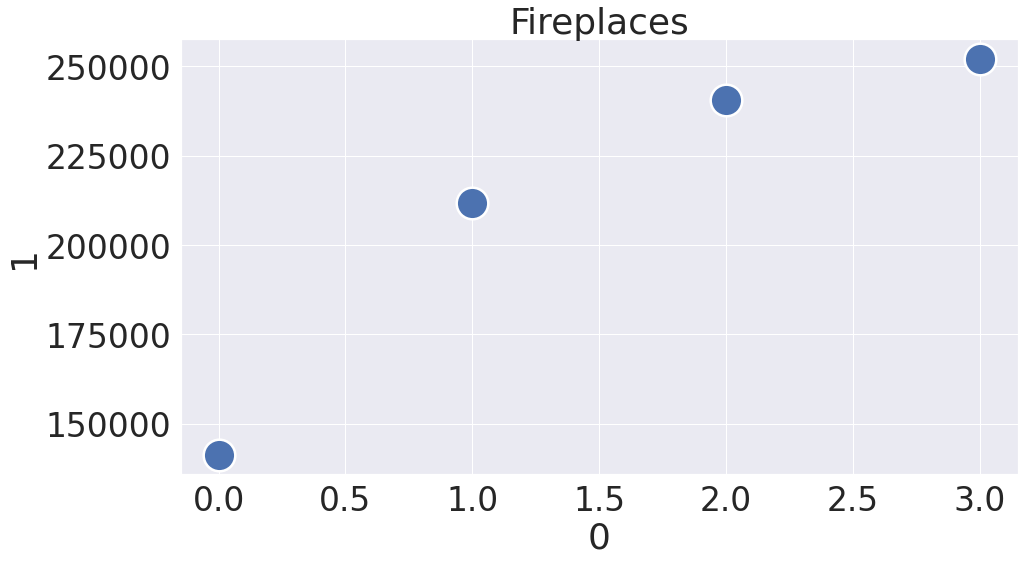

/tmp/ipykernel_6340/445760785.py:10: RuntimeWarning: invalid value encountered in long_scalars
  avg = subset.SalePrice.sum()/len(subset)


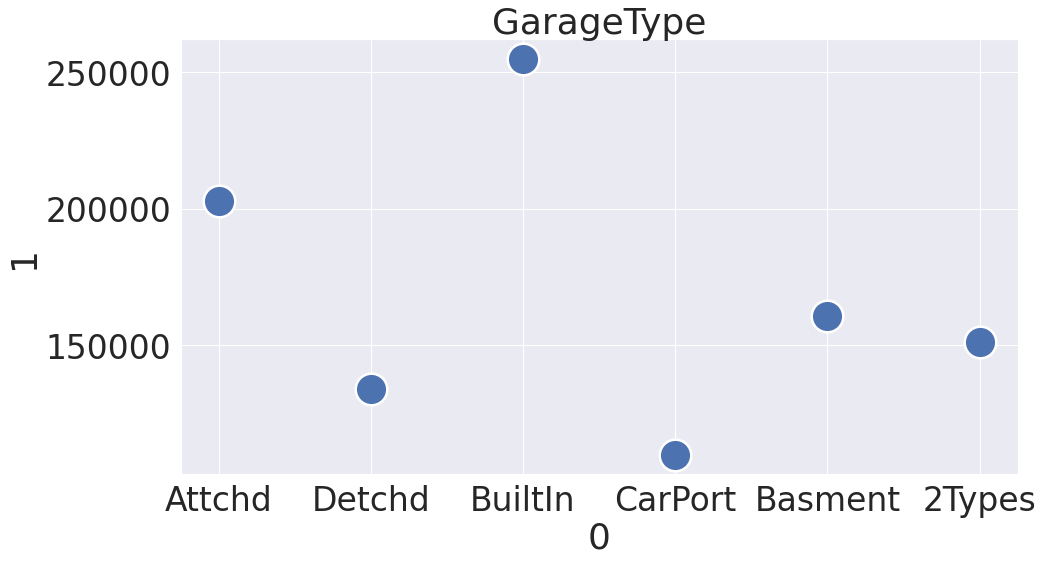

/tmp/ipykernel_6340/445760785.py:10: RuntimeWarning: invalid value encountered in long_scalars
  avg = subset.SalePrice.sum()/len(subset)


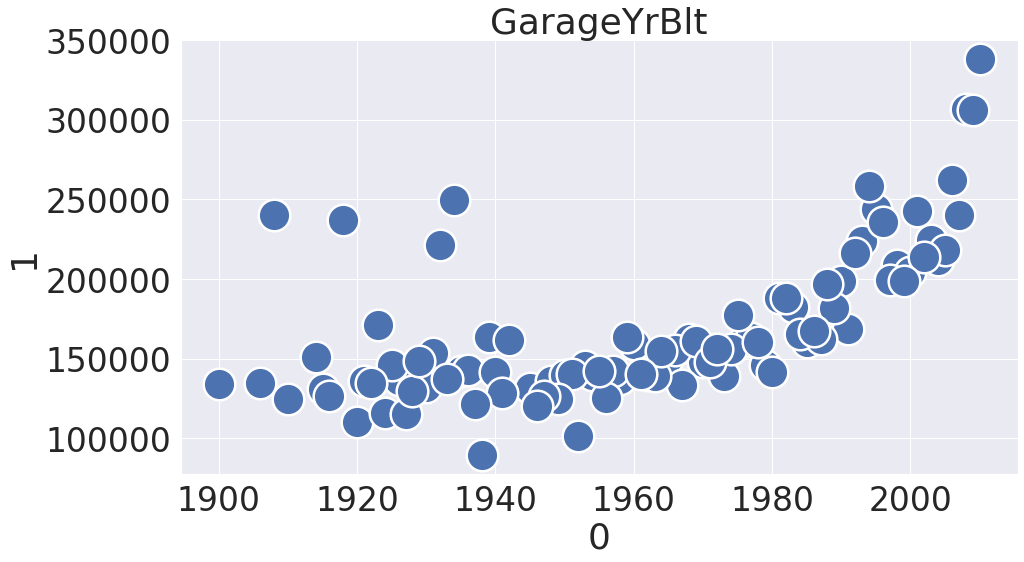

/tmp/ipykernel_6340/445760785.py:10: RuntimeWarning: invalid value encountered in long_scalars
  avg = subset.SalePrice.sum()/len(subset)


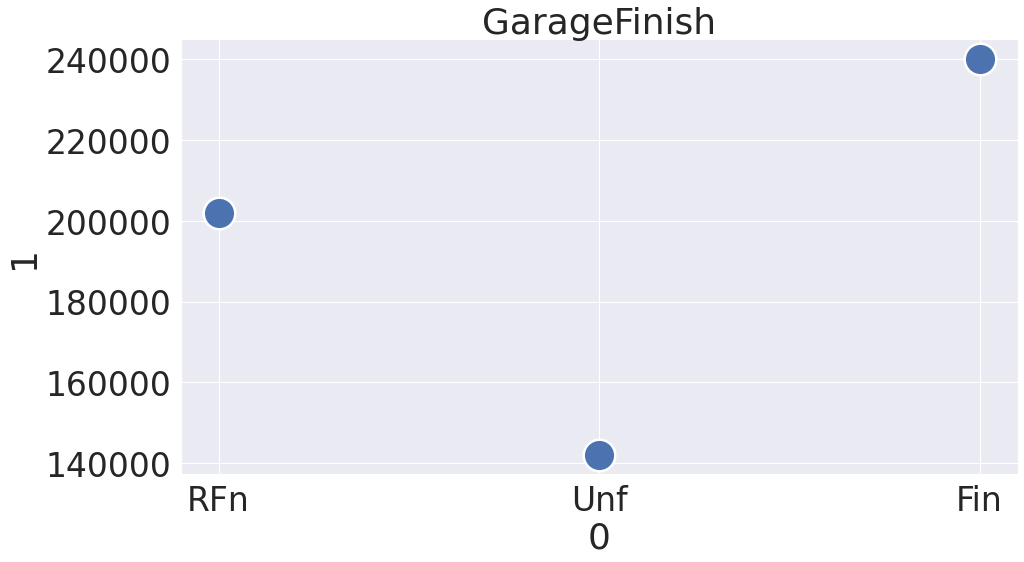

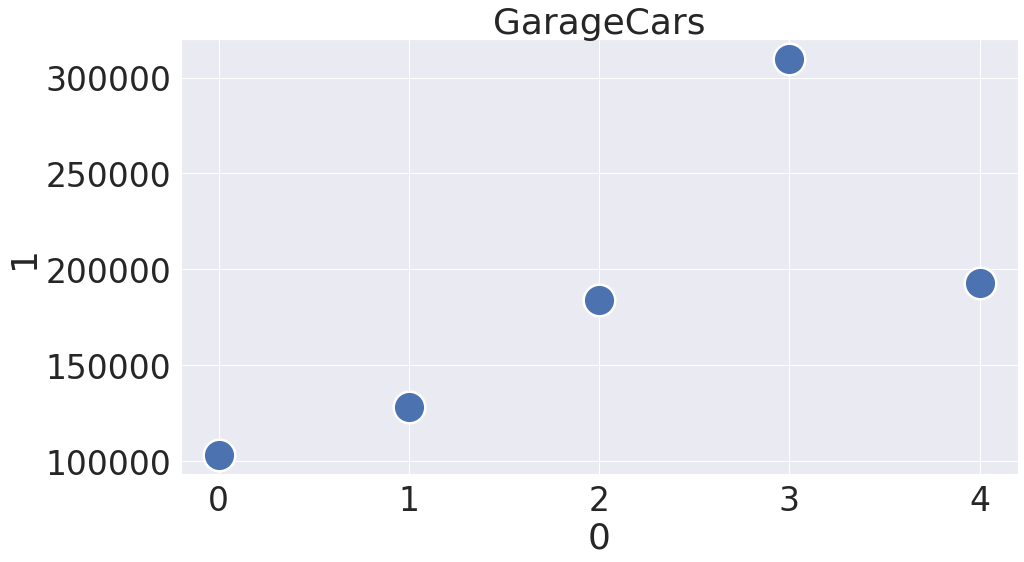

/tmp/ipykernel_6340/445760785.py:10: RuntimeWarning: invalid value encountered in long_scalars
  avg = subset.SalePrice.sum()/len(subset)


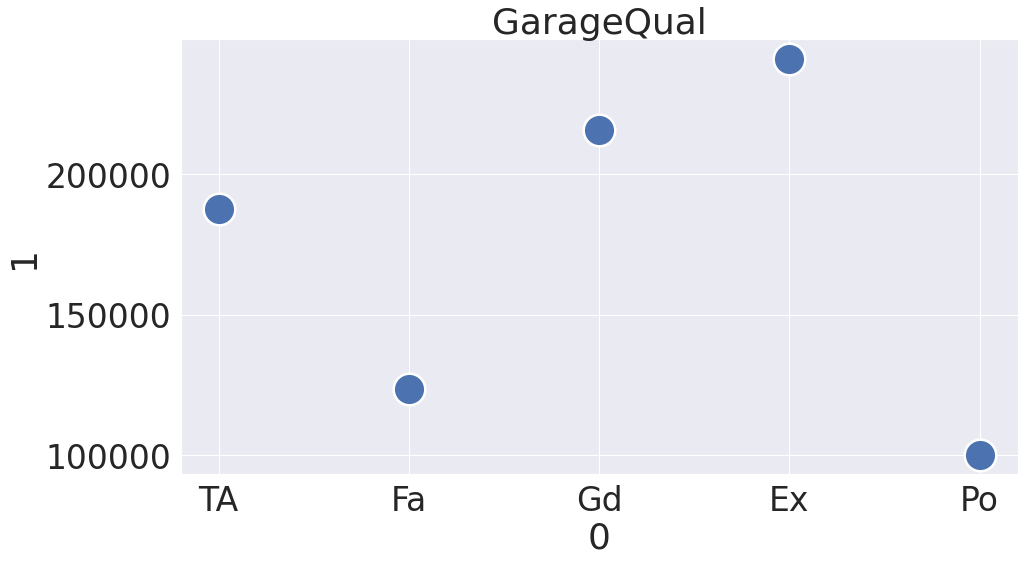

/tmp/ipykernel_6340/445760785.py:10: RuntimeWarning: invalid value encountered in long_scalars
  avg = subset.SalePrice.sum()/len(subset)


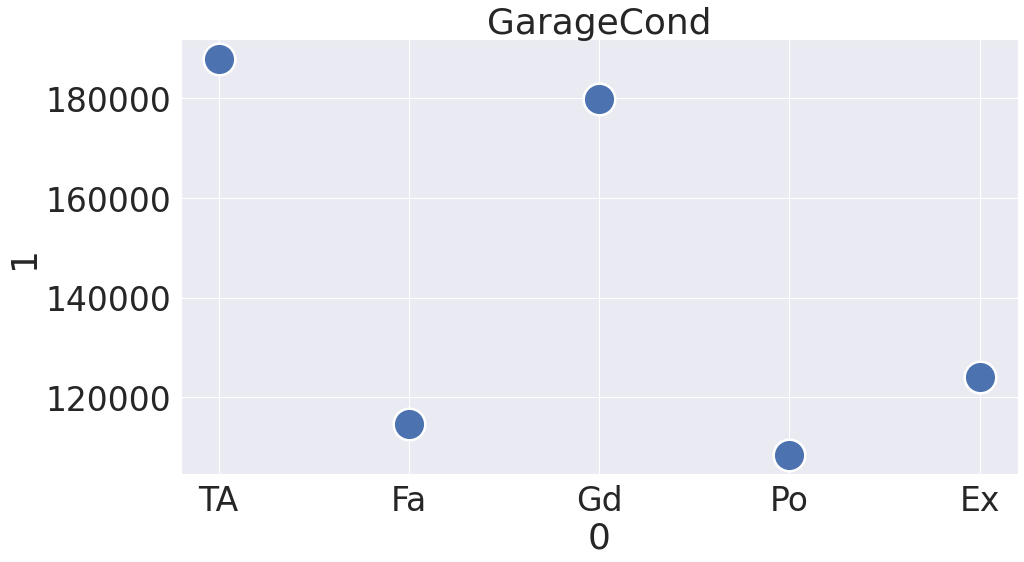

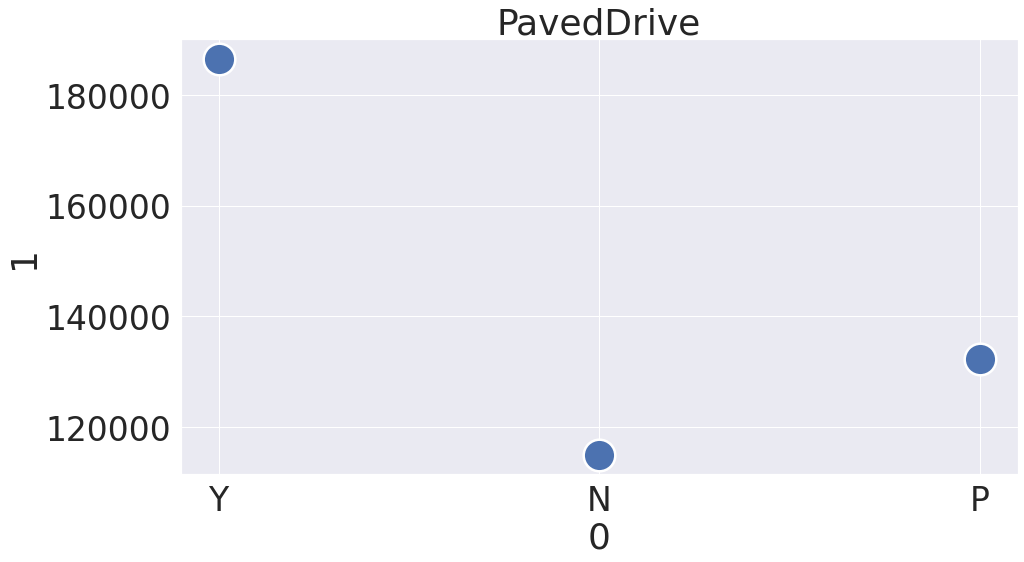

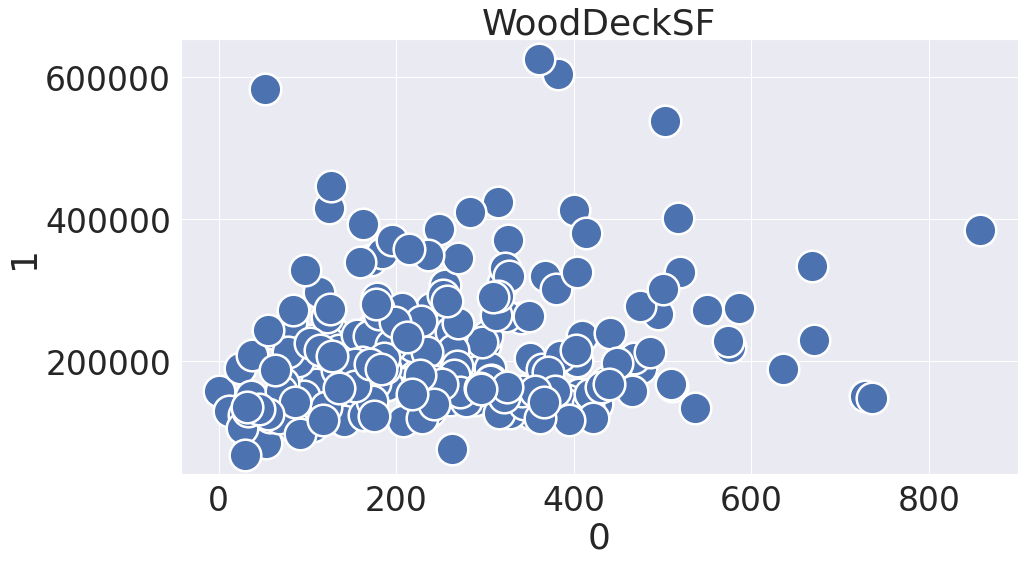

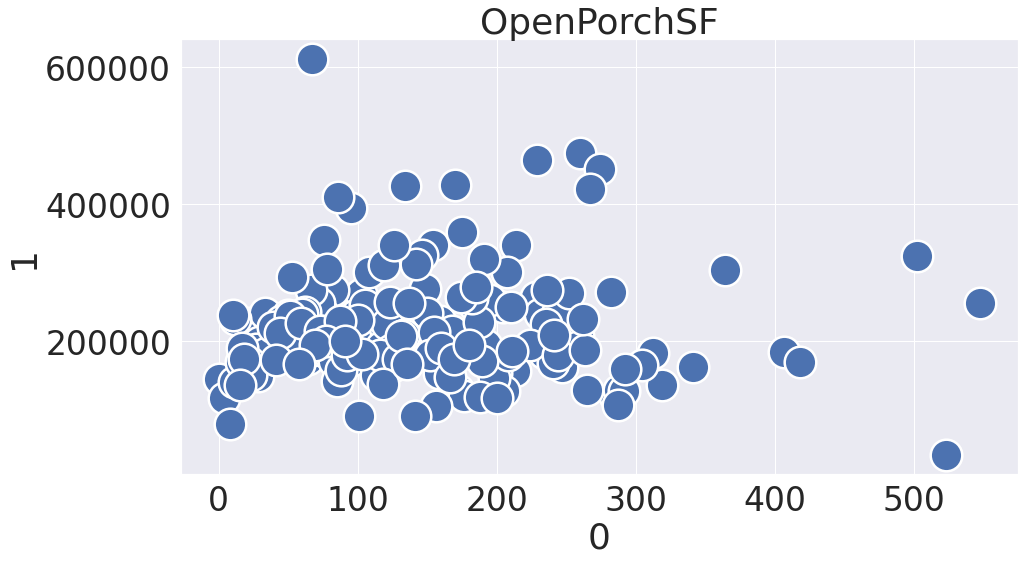

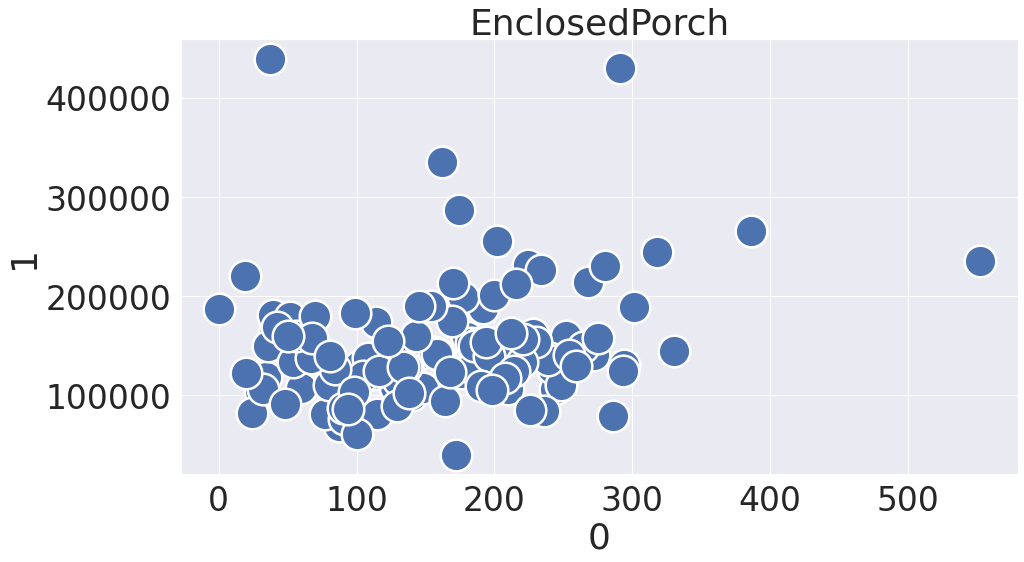

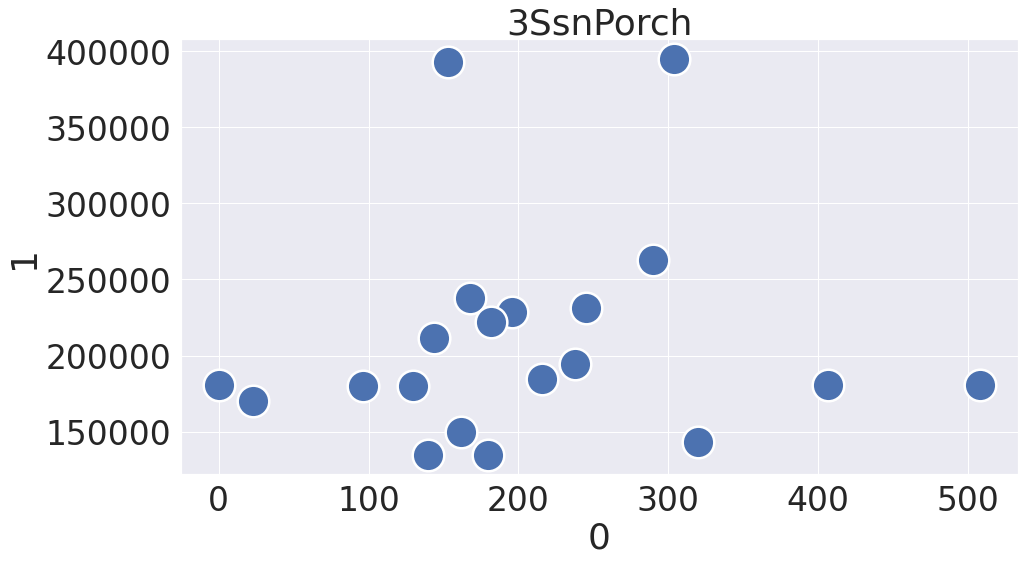

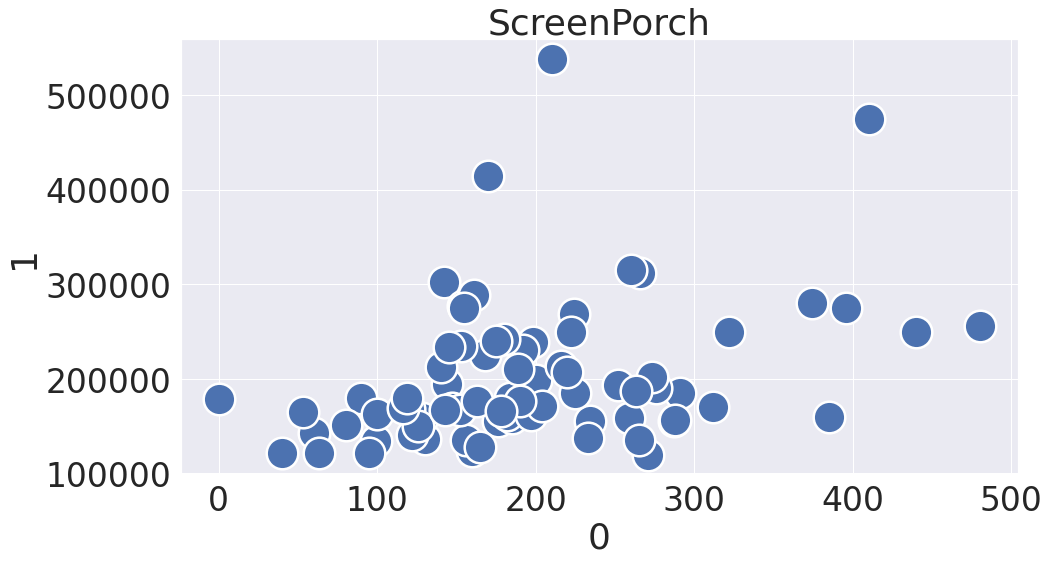

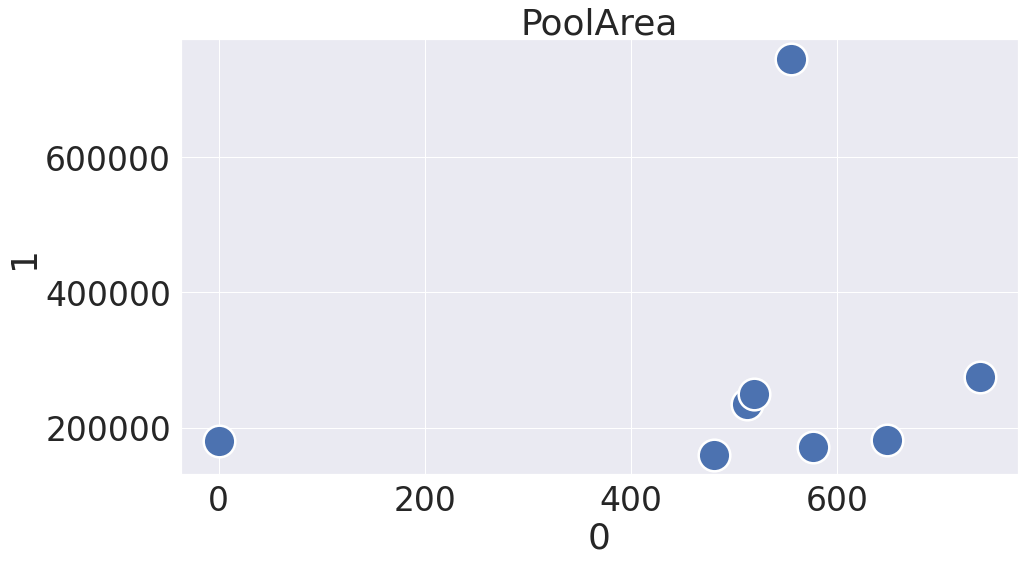

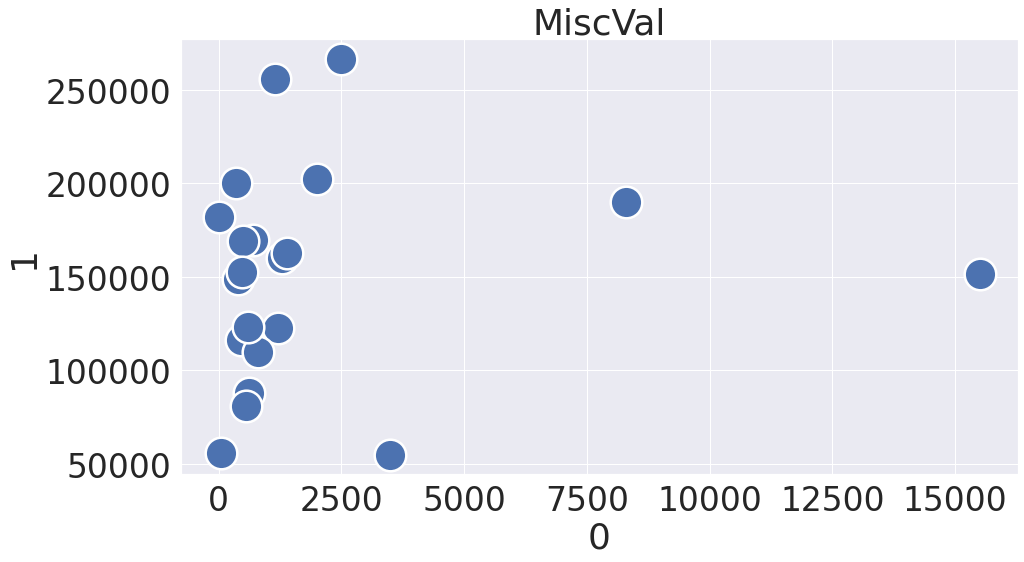

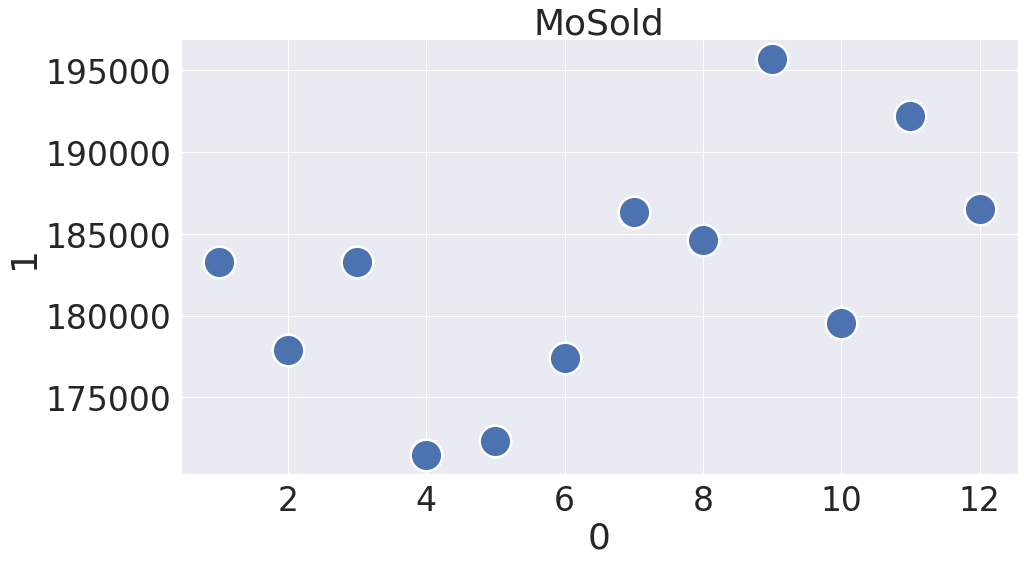

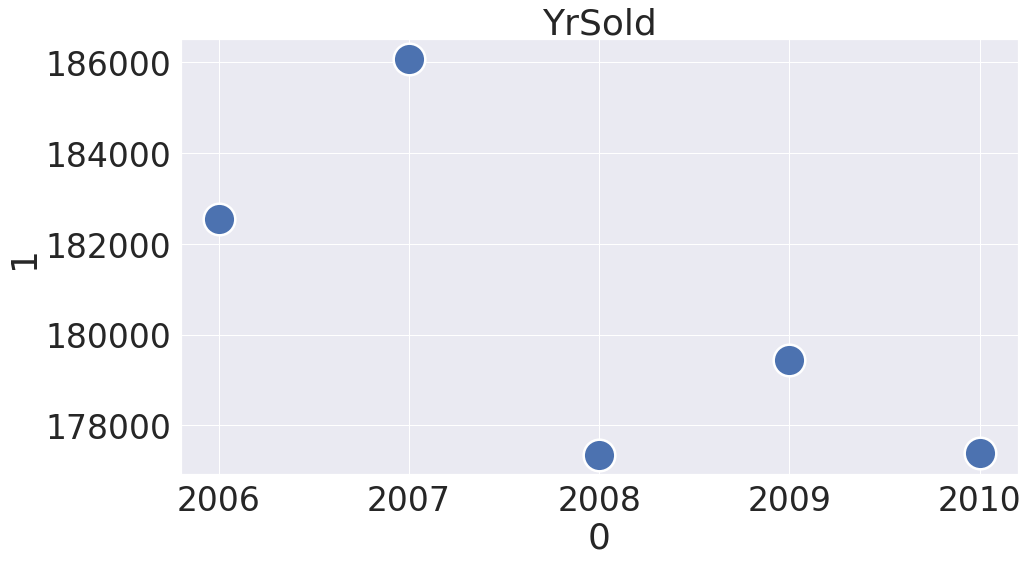

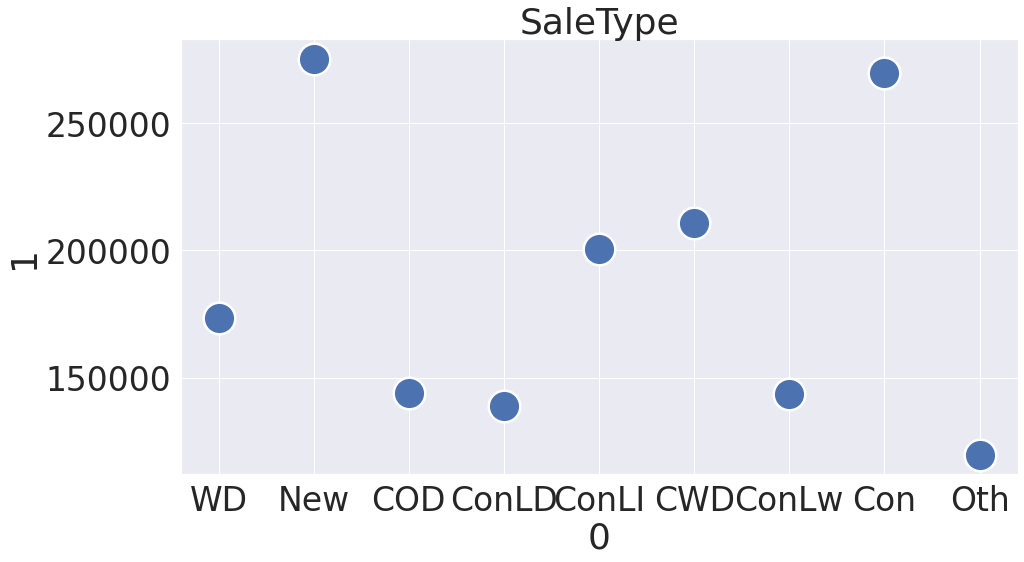

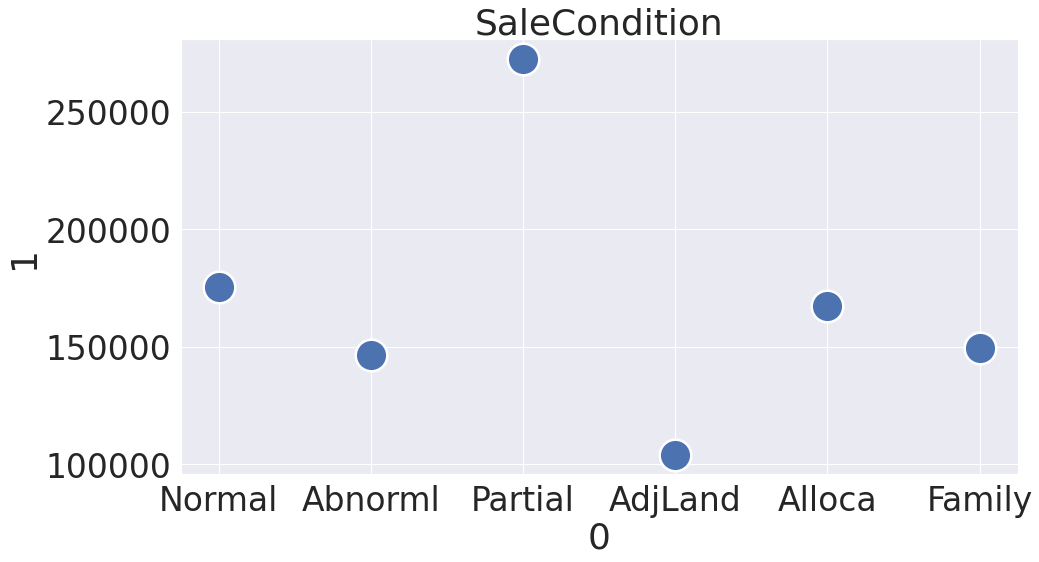

In [42]:
#for each category in each categorical column, print the average sale price of that value
df_cat_y = pd.concat([df['SalePrice'], df_cat], axis = 1)
sns.set(font_scale=3)
for col in df_cat:
    vals = list(df_cat.loc[:,col].unique())
    avg = 0
    avgs = []
    for i in vals:
        subset = df_cat_y.loc[df[col] == i]
        avg = subset.SalePrice.sum()/len(subset)
        avgs.append([i, avg])
    sns.scatterplot(data = pd.DataFrame(avgs), x=0, y=1, s=1000).set(title=col)
    plt.show()

The only features that really caught my eye are already included in our df_num dataframe. 

Handling outliers

In [43]:
df_num.shape

(1460, 18)

In [44]:
#get outliers
z = np.abs(stats.zscore(df_num))
np.where(z>3.5)

(array([  30,   53,   53,   53,   58,   64,   70,  105,  115,  144,  166,
         169,  178,  185,  189,  224,  249,  291,  297,  304,  309,  313,
         330,  335,  335,  349,  357,  375,  384,  451,  457,  477,  495,
         495,  496,  499,  517,  523,  523,  523,  523,  523,  533,  533,
         570,  581,  583,  605,  634,  635,  635,  642,  645,  661,  691,
         691,  691,  706,  713,  735,  738,  755,  769,  784,  798,  807,
         808,  825,  843,  848,  854,  875,  897,  898,  898,  916,  934,
         961,  961,  968,  981,  996, 1024, 1044, 1061, 1068, 1127, 1163,
        1169, 1169, 1182, 1182, 1182, 1182, 1190, 1193, 1210, 1213, 1228,
        1268, 1270, 1289, 1292, 1298, 1298, 1298, 1298, 1298, 1298, 1298,
        1298, 1298, 1313, 1328, 1350, 1373, 1396, 1423, 1459]),
 array([17,  1, 12, 15,  4, 15,  4,  4,  4, 12, 13, 15,  4,  8, 12,  4,  1,
        12,  4,  8, 13,  1, 12,  1, 15,  4, 15,  2,  1,  1,  1,  4, 16, 17,
         6, 16,  4,  4,  5,  6,  8, 16,  2, 

In [45]:
#drop outliers
df_num = df_num[(z < 3.5).all(axis=1)]

In [46]:
df_num.shape

(1367, 18)

In [47]:
X = df_num.drop(columns = 'SalePrice')
y = df_num.SalePrice

In [48]:
X = scaler.fit_transform(X)

In [49]:
#getting an average score based on the random splits
regr3 = LinearRegression()
count = 0
for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .4) 
    regr3.fit(X_train, y_train)
    count = count + regr3.score(X_test, y_test)
print(count/100)

0.8605920581895303


86%... not bad! A notable improvement. 
Let's try some other metrics

In [50]:
# Make predictions using the testing set
y_pred = regr3.predict(X_test)

In [51]:
X_test.size

9299

In [52]:
y_test.size

547

In [53]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', regr3.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Coefficients: 
 [ 0.0106094   0.03406751  0.12800159  0.07581526 -0.00717746  0.03651476
  0.14003938  0.1261152  -0.02497857  0.01199624  0.00138054  0.01170849
 -0.01135013  0.01377816  0.03391331  0.01399967  0.01123088]
Mean squared error: 0.02
Coefficient of determination: 0.86


### Experiment 3
Now that our data is pretty heavily cleaned, let's see if we can throw another model at it just for fun.
I want to see how a Lasso model would perform.

In [54]:
from sklearn import linear_model

In [55]:
regr_lasso = linear_model.Lasso(alpha=.01, max_iter = 10000) 

In [58]:
#repeating previous preprocessing, but on data with dummy variables
data = df
data['SalePrice'] = np.log(data['SalePrice'])
data = pd.get_dummies(data, drop_first = True)
data.fillna(0, inplace = True)
cols = list(data.columns)
data = scaler.fit_transform(data)
z = np.abs(stats.zscore(data))
data = pd.DataFrame(data=data, columns=cols)
data = data[(z < 3.5).all(axis=1)]
X = data.drop(columns = 'SalePrice')
y = data['SalePrice']

In [59]:
#getting an average score based on the random splits
count = 0
for i in range(0, 100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3) 
    regr_lasso.fit(X_train, y_train)
    count = count + regr_lasso.score(X_test, y_test)
print(count/100)

0.8749032528207898


I read that the Lasso model handles multi-collinearity rather well so I wanted to see how it would perform with all the dummy variables. Impressively, it scores a .88, making it the best performer. Not bad considering the regular linear regression model could not function at all when trained with dummy_variables. 